![](https://www.digitalvidya.com/wp-content/uploads/2019/07/Untitled-Design-3-1170x630_cc0561dd420dfaaa5b401ee15eaceb65.jpg)
<font size='5' color='blue' align = 'center'>Table of Contents</font> 
<font size='3' color='purple'>
1. [Introduction](#1)
1. [Missing Data Imputation](#2)
    1. [Complete Case Analysis](#21)
    1. [Mean / Median / Mode Imputation](#22)
    1. [Random Sample Imputation](#23)
    1. [Replacement by Arbitrary Value](#24)
    1. [End of Distribution Imputation](#25)
1. [Categorical Encoding](#3)
    1. [Classic Encoders](#31)
        *  [One Hot Encoder](#311)
        * [Count and Frequency Encoder](#312)
        * [Binary Encoder](#313)
        * [Ordinal Encoder](#314)
        * [BaseN Encoder](#315)
        * [Hashing Encoder](#316)
        * [Sum Encoder](#317)
    1. [Contrast Encoders](#32)
        *  [Helmert (reverse)](#321)
        * [Backward Difference](#322)
        * [Polynomial](#323)
    1. [Bayesian Encoders](#33)     
        *  [Target encoding / Mean encoding](#331)
        * [Weight of Evidence](#332)
        * [Rare Label encoding](#333)
        * [LeaveOneOut](#334)
        * [James-Stein](#335)
        * [M-estimator](#336)
1. [Gaussian Transformation](#4)
    1. [Logarithm transformation](#41)
    1. [Reciprocal transformation](#42)
    1. [Square root transformation](#43)
    1. [Exponential transformation](#44)
    1. [Yeo-Johnson transformation](#45)
    1. [Box-Cox transformation](#46)
1. [Discretisation](#5)
    1. [Equal width discretisation](#51)
    1. [Equal Frequency discretisation](#52)
    1. [Discretisation using decision trees](#53)
1. [Outlier Engineering](#6)
    1. [Outlier Detection & Removal](#61)
        * [Outlier Detection & Removal Using IQR(Inter Quartile Range](#611)
        * [Outlier Detection & Removal using Percentile](#612)   
        * [Outlier Detection & Removal using Z score](#613)   
        * [Outlier Detection using Box Plot](#614)
        * [Outlier Detection using Scatter Plot](#615)     
    1. [Treating outliers as missing values](#62)
    1. [Top / bottom / zero coding](#63)
    1. [Discretisation](#64)
1. [Feature Scaling](#7)
    1. [Standardisation](#71)
    1. [Min-Max Scaling](#72)
    1. [Maximum Absolute Scaling](#73)
    1. [Robust Scaling](#74)
    1. [Mean normalisation](#75) 
    1. [Quantile Transformer Scaler](#76) 
    1. [Power Transformer Scaler](#77) 
    
1. [Date and Time Engineering](#8)
    1. [Introduction](#81)
    1. [Date-Related Features](#82)
    1. [Time-Related Features](#83)
    1. [Lag Features](#84)
    1. [Rolling Window](#85)
    1. [Expanding Window](#86)
    1. [Domain-Specific ](#87)
1. [Read more](#9)  
     1. [References](#111)  

 <a id="1"></a> <br>
# 1. Introduction


## What is Feature Engineering?

### Feature Engineering is a process of extracting useful features from existing raw data using maths,statistics and domain knowledge.


#### Feature Engineering is one of the most important steps to complete before starting a Machine Learning analysis.Most of the basic Feature Engineering techniques consist of finding inconsistencies in the data and of creating new features by combining/diving existing ones. Creating the best possible Machine Learning/Deep Learning model can certainly help to achieve good results, but choosing the right features in the right format to feed in a model can by far boost performances leading to the following benefits:

* Enable us to achieve good model performances using simpler Machine Learning models.
* Using simpler Machine Learning models, increases the transparency of our model, therefore making easier for us to understand how is making its predictions.
* Reduced need to use Ensemble Learning techniques.
* Reduced need to perform Hyperparameters Optimization.

#### In this kernel notebook I am going to cover an exhaustive Feature Engineering topics. I hope you like this kernel and appreciate to leave your suggestions /comments and please do <font color ='red'>UPVOTE</font> if you like this notebook.

# 2. Missing Data Imputation <a id="2"></a> <br>
![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/03/How-to-Handle-Missing-Values-with-Python.jpg)

### Data in real world are rarely clean and homogeneous. Typically this is because of the following reasons

1. Corrupt data
2. Failure to load information
3. Incomplete extraction
4. Noisy, and inconsistent
5. Incomplete data

So it is an important task of a Data scientist to prepossess the data by filling missing values because making the right decision on how to handle it generates robust data models. It is important to be handled as they could lead to wrong prediction or classification for any given model being used. The goal of this article is to cover the basic techniques for handling missing values in a dataset.

Real-world data often has missing values.
Firstly we cannot simply ignore missing values in a dataset. We must handle them in some way for the very practical reason that most algorithms do not accept missing values.

"Common sense" is not sensible here.From my experience the 2 most commonly recommended ways of dealing with missing data actually are not accurate .

They are:

1. Dropping observations that have missing values
2. Imputing the missing values based on other observations

Dropping missing values is sub-optimal because when we drop observations, we drop information.

The fact that the value was missing may be informative in itself.We need to understand business deeper to uncover why this information is missing in real world problems.In real time problems we need to make predictions even if some of the features are missing !!!.


Imputing missing values is sub-optimal because the value was originally missing but you filled it in, which always leads to a loss in information, no matter how sophisticated our imputation method is.

"<b>Missingness</b>" is almost always informative in itself, and we should tell our algorithm if a value was missing.Even if we build a model to impute our values, we are not adding any real information. You’re just reinforcing the patterns already provided by other features.

Basically, **there are three categories of missing data**. We assume that each record or observation can be divided into an "observable component" and an "unobservable component". We also assume that the records are independent and identically distributed.

1. **MCAR (Missing Completely At Random)** where the pattern of missinginess is statistically independent of the data record. Example: you have a data set on a piece of paper and you spill coffee on the paper destroying part of the data.

2. **MAR (Missing At Random)** where the probability distribution of the pattern of missingness is functionally dependent upon the observable component in the record. MCAR is a special case of MAR. Example: you have a question on a survey asking if the survey participant is a drug addict and another question which asks if the survey participant has less than one alcoholic drink per year. Assume the answer to the alcoholic drink question is always observable, then the probability that someone fails to answer the drug addict question is most likely functionally dependent upon their answer to the alcoholic drink question.

3. **MNAR (Missing Not at Random)** which is defined as the case which is NOT MAR. In the MNAR case, you can have situations where both the drug addict and alcoholic drink questions are absent in the same record. Another example, is a case where the question is: "What is your gender?" Suppose that females are less likely to answer this question than males. This is another example of an MNAR question because the probability that the answer is observable is conditionally dependent upon the unobservable component of the data record.

Now that we know the basic terminology,I like to share some strategies and recommendations

### Important Strategies:

1. We should never insert mean, mode, median, max, min or anything else for missing values. That is, avoid deterministic imputation even though it is widely used and available in most software packages. It underestimates and distorts the statistical regularities (e.g., underestimates variance is one example) present in the data sample. 

2. If the data records are MCAR Then you can delete records with missing data.

3. If the data records are MCAR, then sometimes you can stochastically impute the missing values rather than deterministically impute them. So this means that if you specify the marginal probability distribution of a missing value as Gaussian with some known mean and some known variance then you can sample from that distribution to impute values into the data set. We need to be careful and do some additional research  and analysis on data ,understand the business completely and take a judicious decision.

4. If the data is MAR then an algorithm such as Expectation Maximization can be used to handle the missing observations.

5. If the data is MNAR we can include binary indicators in the data record which explicitly identify when a variable is not observable. The challenge with this approach is that a highly nonlinear model needs to be designed to properly integrate this information in an appropriate manner. This might work in a machine learning algorithm where the binary indicators "disconnect" the influence of predictors which are not observable. Consequently, the MNAR theory (i.e., the theory of the joint distribution of the complete data record and missing data pattern) is instantiated in the learning machine's probabilistic model of its statistical environment.


### Missing numeric data

For missing numeric data, we should flag and fill the values.

1. Flag the observation with an indicator variable of missingness.
2. Secondly fill the original missing value with 0 just to meet the technical requirement of no missing values.

By using this technique of flagging and filling, we are essentially allowing the algorithm to estimate the optimal constant for missingness, instead of just filling it in with the mean.

### Missing categorical data

The best way to handle missing data for categorical features is to simply label them as ’Missing’!

1. We are essentially adding a new class for the feature.
2. This tells the algorithm that the value was missing.
3. This also gets around the technical requirement for no missing values.

#### For detailed understanding of missing value treatment please visit my other kernel https://www.kaggle.com/pavansanagapati/simple-tutorial-how-to-handle-missing-data

## 1. Complete Case Analysis<a id="21"></a> <br>

**Complete-case analysis (CCA)**, also called list-wise deletion of cases, consists in simply discarding observations where values in any of the variables are missing. Complete Case Analysis means literally analysing only those observations for which there is information in all of the variables (Xs). 
CCA can be applied to both categorical and numerical variables.

**Assumptions**
CCA works well when the data are missing completely at random (MCAR). In this case, excluding observations with missing data would be the same as randomly excluding some observations from the dataset, given that the missing data are totally at random. 

**Advantages**
* Easy to implement
* The same set of data is used for all analyses (no data manipulation)
* Preserves variable distribution (if data is MCAR, then the distribution of the variables of the reduced dataset should match the distribution in the original dataset)

**Disadvantages**
* It can exclude a large fraction of the original sample, which are potentially informative for the analysis
* CCA will be biased if the complete cases systematically differ from the original sample (e.g. when the missing information is in fact MAR or NMAR: not missing at random).

In practice, CCA may be an acceptable method when the amount of missing information is small. Unfortunately, there is no rule of thumb to determine how much missing data is small or negligible.

In many real life datasets, the amount of missing data is never small, and therefore CCA is typically never an option. 

## Cornell Birdcall Identification Challenge
![](https://qph.fs.quoracdn.net/main-qimg-85bcf06abaadda183a88594b923f41fc.webp)
Over 10,000 bird species occur in the world, and they can be found in nearly every environment, from untouched rainforests to suburbs and even cities. Birds play an essential role in nature. They are high up in the food chain and integrate changes occurring at lower levels. As such, birds are excellent indicators of deteriorating habitat quality and environmental pollution. However, it is often easier to hear birds than see them.

With proper sound detection and classification, researchers could automatically intuit factors about an area’s quality of life based on a changing bird population.

There are already many projects underway to extensively monitor birds by continuously recording natural soundscapes over long periods. However, as many living and nonliving things make noise, the analysis of these datasets is often done manually by domain experts. These analyses are painstakingly slow, and results are often incomplete. Data science may be able to assist, so researchers have turned to large crowdsourced databases of focal recordings of birds to train AI models. Unfortunately, there is a domain mismatch between the training data (short recording of individual birds) and the soundscape recordings (long recordings with often multiple species calling at the same time) used in monitoring applications. This is one of the reasons why the performance of the currently used AI models has been subpar.

### Objective

To identify a wide variety of bird vocalizations in soundscape recordings. Due to the complexity of the recordings, they contain weak labels. There might be anthropogenic sounds (e.g., airplane overflights) or other bird and non-bird (e.g., chipmunk) calls in the background, with a particular labeled bird species in the foreground. Bring new ideas to build effective detectors and classifiers for analyzing complex soundscape recordings.

So let us use the dataset of Cornell Lab of Ornithology’s Center for Conservation Bioacoustics (CCB) to do a complete exploratory data analysis and finding the insights about data and based on the findings come up with AI model that can achieve the above objective.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
# Load Data
train = pd.read_csv('../input/birdsong-recognition/train.csv')
test = pd.read_csv('../input/birdsong-recognition/test.csv')

In [2]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21375 entries, 0 to 21374
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rating            21375 non-null  float64
 1   playback_used     19575 non-null  object 
 2   ebird_code        21375 non-null  object 
 3   channels          21375 non-null  object 
 4   date              21375 non-null  object 
 5   pitch             21375 non-null  object 
 6   duration          21375 non-null  int64  
 7   filename          21375 non-null  object 
 8   speed             21375 non-null  object 
 9   species           21375 non-null  object 
 10  number_of_notes   21375 non-null  object 
 11  title             21375 non-null  object 
 12  secondary_labels  21375 non-null  object 
 13  bird_seen         19575 non-null  object 
 14  sci_name          21375 non-null  object 
 15  location          21375 non-null  object 
 16  latitude          21375 non-null  object

(None, None)

,Total,Percent
background,13075,0.611696
description,6199,0.290012
playback_used,1800,0.084211
bird_seen,1800,0.084211
bitrate_of_mp3,8,0.000374


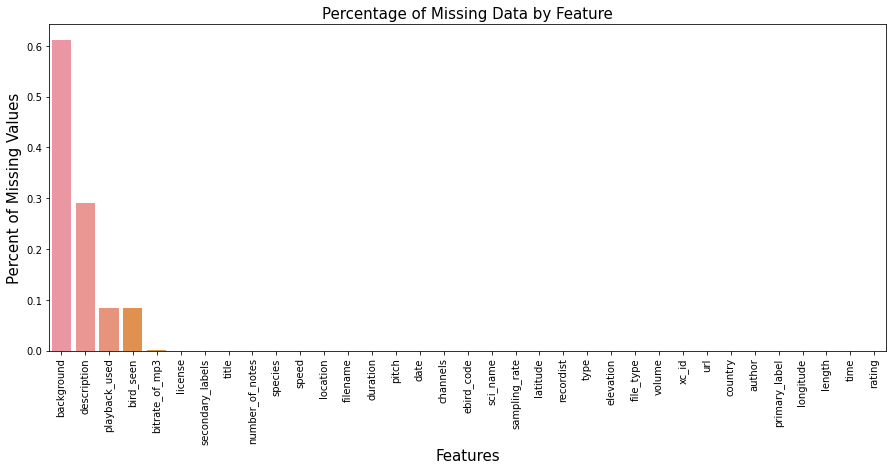

In [3]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of Missing Values', fontsize=15)
plt.title('Percentage of Missing Data by Feature', fontsize=15)
missing_data.head()

In [4]:
# let's go ahead and have a look at how many observations we would drop
print('Total bird records with values in all variables: ', train.dropna().shape[0])
print('Total bird records: ', train.shape[0])

Total bird records with values in all variables:  5994
Total bird records:  21375


In fact, we have complete information for only close 25% of our records in the above dataset. Thus, CCA would not be an option for this dataset.
## 2. Mean / Median / Mode Imputation<a id="22"></a> <br>

This strategy can be applied on a feature which has numeric data like the age of a person or the ticket fare. We can calculate the mean, median or mode of the feature and replace it with the missing values. This is an approximation which can add variance to the data set. But the loss of the data can be negated by this method which yields better results compared to removal of rows and columns. Replacing with the above three approximations are a statistical approach of handling the missing values. This method is also called as leaking the data while training. Another way is to approximate it with the deviation of neighbouring values. This works better if the data is linear.

MEAN: Suitable for continuous data without outliers

In [5]:
# Load Data
train = pd.read_csv('../input/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000


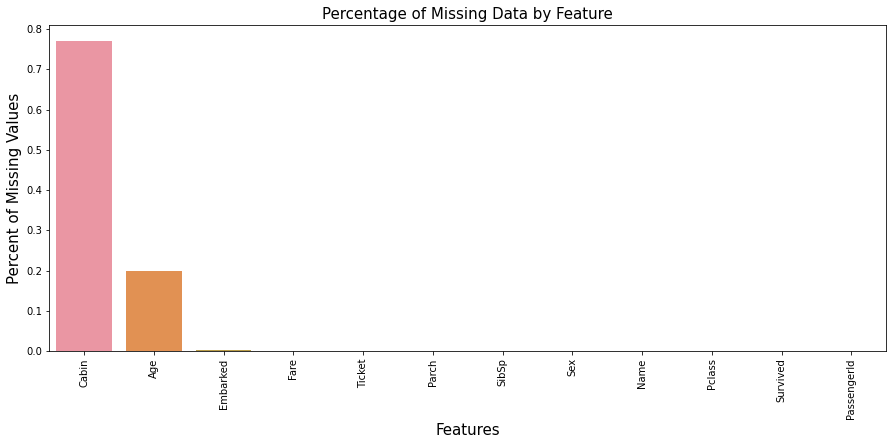

In [6]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of Missing Values', fontsize=15)
plt.title('Percentage of Missing Data by Feature', fontsize=15)
missing_data.head()

In [7]:
#Let us take Age feature and find the total no of records it has null values
df = train
df['Age'].isnull().sum()

177

In [8]:
df['Age'].replace(np.NaN,df['Age'].mean()).head(15)

0     22.000000
1     38.000000
2     26.000000
3     35.000000
4     35.000000
5     29.699118
6     54.000000
7      2.000000
8     27.000000
9     14.000000
10     4.000000
11    58.000000
12    20.000000
13    39.000000
14    14.000000
Name: Age, dtype: float64

As you see above in the fifth row the mean value is replaced in place of NaN.

**MEDIAN :** Suitable for continuous data with outliers

In [9]:
df_median = train
df_median['Age'].fillna(df_median['Age'].median(),inplace=True)
df_median['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

**Mode:** 

For categorical feature we can select to fill in the missing values with the most common value(mode) as illustrated below.

In [10]:
# Load Data
train = pd.read_csv('../input/birdsong-recognition/train.csv')

In [11]:
# As per the categorical features which have missing values I have choosen "background" as feature for Mode imputation

data_cat=train
data_cat['background'].fillna(data_cat['background'].mode()[0], inplace=True)
data_cat['background'].head()

0    American Yellow Warbler (Setophaga aestiva); L...
1           Red-winged Blackbird (Agelaius phoeniceus)
2           Red-winged Blackbird (Agelaius phoeniceus)
3    Grey Catbird (Dumetella carolinensis); Cedar W...
4           Red-winged Blackbird (Agelaius phoeniceus)
Name: background, dtype: object

## 3. Random Sample Imputation<a id="23"></a> <br>

Imputation is the act of replacing missing data with statistical estimates of the missing values. The goal of any imputation technique is to produce a complete dataset that can then be then used for machine learning.

Random sampling imputation is in principle similar to mean/median imputation, in the sense that it aims to preserve the statistical parameters of the original variable, for which data is missing.

Random sampling consist of taking a random observation from the pool of available observations of the variable, and using that randomly extracted value to fill the NA. In Random Sampling one takes as many random observations as missing values are present in the variable.

By random sampling observations of the variable for those instances where data is available, we guarantee that the mean and standard deviation of the variable are preserved.

**Assumptions**

* Random sample imputation assumes that the data are missing completely at random (MCAR). If this is the case, it makes sense to substitute the missing values, by values extracted from the original variable distribution. 
* From a probabilistic point of view, values that are more frequent (like the mean or the median) will be selected more often (because there are more of them to select from), but other less frequent values will be selected as well. Thus, the variance of the variable is preserved. 
* The rationale is to replace the population of missing values with a population of values with the same distribution of the variable.

**Advantages**
* Easy to implement
* Fast way of obtaining complete datasets
* Preserves the variance of the variable

**Limitations**
* Randomness

Randomness may not seem much of a concern when replacing missing values for data competitions, where the whole batch of missing values is replaced once and then the dataset is scored and that is the end of the problem. However, in business scenarios the situation is very different. 

Replacement of missing values by random sample, although similar in concept to replacement by the median or mean, is not as widely used in the data science community as the mean/median imputation, presumably because of the element of randomness.However, it is a valid approach, with advantages over mean/median imputation as it preserves the distribution of the variable.

In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
train = pd.read_csv('../input/titanic/train.csv', usecols = ['Age', 'Fare', 'Survived'])

In [13]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(train, train.Survived, test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((623, 3), (268, 3))

In [14]:
# let's make a function to create 3 variables from Age 1-filling NA with median, 2- random sampling or 3- zeroes

def impute_na(df, variable, median):
    df[variable+'_median'] = df[variable].fillna(median)
    df[variable+'_zero'] = df[variable].fillna(0)
    
    # random sampling
    df[variable+'_random'] = df[variable]
    # extract the random sample to fill the na
    random_sample = X_train[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample

In [15]:
median = X_train.Age.mean()
impute_na(X_train, 'Age', median)
X_train.head(20)

,Survived,Age,Fare,Age_median,Age_zero,Age_random
857,1,51.0,26.5500,51.000000,51.0,51.0
52,1,49.0,76.7292,49.000000,49.0,49.0
386,0,1.0,46.9000,1.000000,1.0,1.0
124,0,54.0,77.2875,54.000000,54.0,54.0
578,0,NaN,14.4583,29.915339,0.0,16.0
549,1,8.0,36.7500,8.000000,8.0,8.0
118,0,24.0,247.5208,24.000000,24.0,24.0
12,0,20.0,8.0500,20.000000,20.0,20.0
157,0,30.0,8.0500,30.000000,30.0,30.0
127,1,24.0,7.1417,24.000000,24.0,24.0


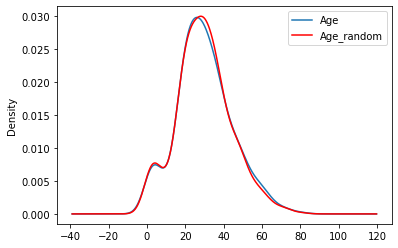

In [16]:
# Let us see the distribution of the Age variable after filling NA with random value
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['Age'].plot(kind='kde', ax=ax)
X_train.Age_random.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

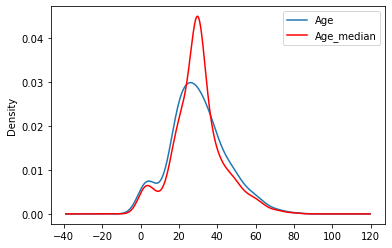

In [17]:
# Let us see distribution of the Age variable after filling NA with median value
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['Age'].plot(kind='kde', ax=ax)
X_train.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

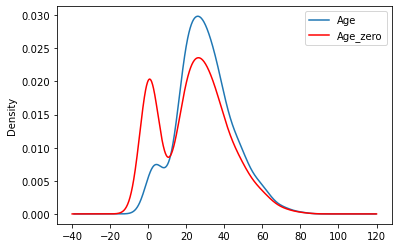

In [18]:
# Let us see distribution of the Age variable after filling NA with zero value
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['Age'].plot(kind='kde', ax=ax)
X_train.Age_zero.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## 4. Replacement by Arbitrary Value<a id="24"></a> <br>

Replacing the NA by artitrary values should be used when there are reasons to believe that the NA are not missing at random. In situations like this, we would not like to replace with the median or the mean, and therefore make the NA look like the majority of our observations.
Instead, we want to flag them. We want to capture the missingness somehow by following the below approaches

1) adding an additional binary variable to indicate whether the value is missing (1) or not (0)
2) replacing the NA by a value at a far end of the distribution

It consists of replacing the NA by an arbitrary value. 

The problem consists in deciding which arbitrary value to choose.

**Advantages**

* Easy to implement
* Captures the importance of missingess if there is one

**Disadvantages**

* Distorts the original distribution of the variable
* If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
* Hard to decide which value to use If the value is outside the distribution it may mask or create outliers

When variables are captured by third parties, like credit agencies, they place arbitrary numbers already to signal this missingness. It is a common practice in real life data collections.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
train = pd.read_csv('../input/titanic/train.csv', usecols = ['Age', 'Fare', 'Survived'])

In [20]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(train, train.Survived, test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((623, 3), (268, 3))

In [21]:
#Let us define a function with replacement of NA value with an arbitrary value as 0 and 100
def impute_na(df, variable):
    df[variable+'_zero'] = df[variable].fillna(0)
    df[variable+'_hundred']= df[variable].fillna(100)

In [22]:
# let's replace the NA with the median value in the training set
impute_na(X_train, 'Age')
X_train.head()

,Survived,Age,Fare,Age_zero,Age_hundred
857,1,51.0,26.5500,51.0,51.0
52,1,49.0,76.7292,49.0,49.0
386,0,1.0,46.9000,1.0,1.0
124,0,54.0,77.2875,54.0,54.0
578,0,NaN,14.4583,0.0,100.0


The arbitrary value has to be determined for each variable specifically. For example, for this dataset, the choice of replacing NA in age by 0 or 100 are valid, because none of those values are frequent in the original distribution of the variable, and they lie at the tails of the distribution.

However, if we were to replace NA in fare, those values are not good any more, because we can see that fare can take values of up to 500. So we might want to consider using 500 or 1000 to replace NA instead of 100.
As you can see this is totally arbitrary. And yet, it is used in the industry.

Typical values chose by companies are -9999 or 9999, or similar.

## 5. End of Distribution Imputation<a id="25"></a> <br>

On occasions, one has reasons to suspect that missing values are not missing at random. And if the value is missing, there has to be a reason for it. Therefore, we would like to capture this information.

Adding an additional variable indicating missingness may help with this task. However, the values are still missing in the original variable, and they need to be replaced if we plan to use the variable in machine learning.

Sometimes, we may also not want to increase the feature space by adding a variable to capture missingness.
So what can we do instead?

We can replace the NA, by values that are at the far end of the distribution of the variable.

The rationale is that if the value is missing, it has to be for a reason, therefore, we would not like to replace missing values for the mean and make that observation look like the majority of our observations. Instead, we want to flag that observation as different, and therefore we assign a value that is at the tail of the distribution, where observations are rarely represented in the population.

**Advantages**

* Easy to implement
* Captures the importance of missingess if there is one

**Disadvantages**

* Distorts the original distribution of the variable
* If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
* If the number of NA is big, it will mask true outliers in the distribution
* If the number of NA is small, the replaced NA may be considered an outlier and pre-processed in a subsequent step of feature engineering

This method is used in finance companies. When capturing the financial history of customers, if some of the variables are missing, the company does not like to assume that missingness is random. Therefore, a different treatment is provided to replace them, by placing them at the end of the distribution.

Let us see how we can implement this imputation below

In [23]:
train = pd.read_csv('../input/titanic/train.csv', usecols = ['Age', 'Fare', 'Survived'])
train.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [24]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(train, train.Survived, test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((623, 3), (268, 3))

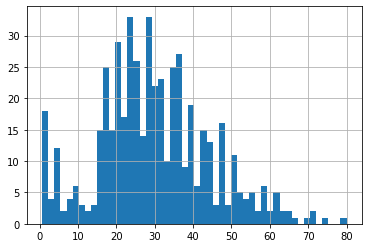

In [25]:
X_train.Age.hist(bins=50)

In [26]:
# far end of the distribution
X_train.Age.mean()+3*X_train.Age.std()

73.43632005918366

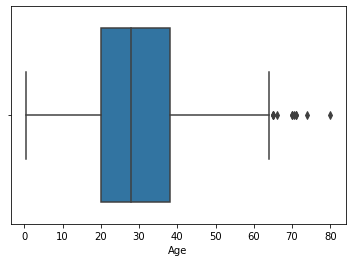

In [27]:
# Let us see if there are a few outliers for Age, according to its distribution these outliers will be masked when we replace NA by values at the far end 
sns.boxplot('Age', data=train)

In [28]:
def impute_na(df, variable, median, extreme):
    df[variable+'_far_end'] = df[variable].fillna(extreme)
    df[variable].fillna(median, inplace=True)

In [29]:
# let's replace the NA with the median value in the training and testing sets
impute_na(X_train, 'Age', X_train.Age.median(), X_train.Age.mean()+3*X_train.Age.std())
X_train.head(20)

,Survived,Age,Fare,Age_far_end
857,1,51.0,26.5500,51.00000
52,1,49.0,76.7292,49.00000
386,0,1.0,46.9000,1.00000
124,0,54.0,77.2875,54.00000
578,0,29.0,14.4583,73.43632
549,1,8.0,36.7500,8.00000
118,0,24.0,247.5208,24.00000
12,0,20.0,8.0500,20.00000
157,0,30.0,8.0500,30.00000
127,1,24.0,7.1417,24.00000


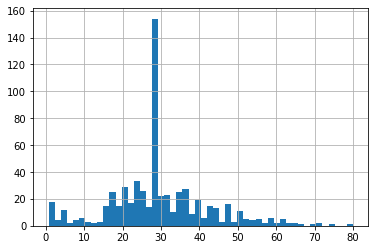

In [30]:
# As you can see an accumulation of values around the median for the median imputation
X_train.Age.hist(bins=50)

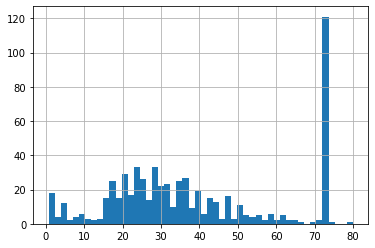

In [31]:
# Now finally let us see an accumulation of values at the far end imputation
X_train.Age_far_end.hist(bins=50)

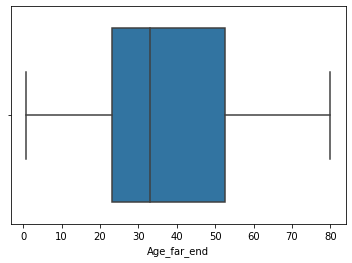

In [32]:
# Far end imputation now indicates that there are no outliers in the variable as shown below
sns.boxplot('Age_far_end', data=X_train)

# 3. Categorical Encoding <a id="3"></a> <br>
![](https://miro.medium.com/max/2560/1*wYbTRM0dgnRzutwZq63xCg.png)
Better encoding of categorical data can mean better model performance.

The categorical-encoder is the most extensive Python package for categorical variable encoding, including some common procedures like one hot encoding and weight of evidence, as well as more complex ways of encoding variables like BaseN and feature hashing. 

Use Category Encoders to improve model performance when you have nominal or ordinal data that may provide value.

**So before get into details of encoders let us first understand how many types of data and what are they?
**

There are four data measurement scales in research and statistics.They are 

* Nominal Data
* Ordinal Data
* Interval Data
* Ratio Data

The Nominal and Ordinal data types are classified under categorical

Interval and ratio data are classified under numerical

Categorical data is a data type that not quantitative i.e. does not have a number. Therefore, both nominal and ordinal data are non-quantitative, which may mean a string of text or date. 

**What is Nominal Data? **

Nominal data is defined as data that is used for naming or labelling variables, without any quantitative value. It is sometimes called “named” data - a meaning coined from the word nominal. There is usually no intrinsic ordering to nominal data. For example, Race is a nominal variable having a number of categories, but there is no specific way to order from highest to lowest and vice versa.

**What is Ordinal Data?  **

Ordinal data is a type of categorical data with an order. The variables in ordinal data are listed in an ordered manner. The ordinal variables are usually numbered, so as to indicate the order of the list. However, the numbers are not mathematically measured or determined but are merely assigned as labels for opinions.


Nominal data is a group of non-parametric variables, while Ordinal data is a group of non-parametric ordered variables. Although, they are both non-parametric variables, what differentiates them is the fact that ordinal data is placed into some kind of order by their position.

**For example, very hot, hot, cold, very cold, warm are all nominal data when considered individually. But when placed on a scale and arranged in a given order (very hot, hot, warm, cold, very cold), they are regarded as ordinal data.**


**Cardinality:**"Cardinality" means the number of unique values in a column.

For nominal columns we use OneHotEncoder, Hashing, LeaveOneOut, and Target encoding. Avoid OneHot for high cardinality columns and decision tree-based algorithms.

For ordinal columns try Ordinal (Integer), Binary, OneHot, LeaveOneOut, and Target. Helmert, Sum, BackwardDifference and Polynomial are less likely to be helpful, but if you have time or theoretic reason you might want to try them.


**Important Note** : We should classify data as one of seven types to make better models faster. Here are the seven data types:

* Useless — useless for machine learning algorithms, that is — discrete
* Nominal — groups without order — discrete
* Binary — either/or — discrete
* Ordinal — groups with order — discrete
* Count — the number of occurrences — discrete
* Time — cyclical numbers with a temporal component — continuous
* Interval — positive and/or negative numbers without a temporal component — continuous


**Classic Encoders**
The first group of five classic encoders can be seen on a continuum of embedding information in one column (Ordinal) up to k columns (OneHot). These are very useful encodings for machine learning practitioners to understand.

* **OneHot** — one column for each value to compare vs. all other values. Nominal, ordinal.
* **Binary** — convert each integer to binary digits. Each binary digit gets one column. Some info loss but fewer dimensions. Ordinal.
* **Ordinal** — convert string labels to integer values 1 through k. Ordinal.
* **BaseN** — Ordinal, Binary, or higher encoding. Nominal, ordinal. Doesn’t add much functionality. Probably avoid.
* **Hashing** — Like OneHot but fewer dimensions, some info loss due to collisions. Nominal, ordinal.
* **Sum** — Just like OneHot except one value is held constant and encoded as -1 across all columns.

**Contrast Encoders**
The five contrast encoders all have multiple issues that I argue make them unlikely to be useful for machine learning. They all output one column for each value found in a column. Their stated intents are below.

* **Helmert (reverse)** — The mean of the dependent variable for a level is compared to the mean of the dependent variable over all previous levels.
* **Backward Difference** — the mean of the dependent variable for a level is compared with the mean of the dependent variable for the prior level.
* **Polynomial — orthogonal polynomial contrasts**. The coefficients taken on by polynomial coding for k=4 levels are the linear, quadratic, and cubic trends in the categorical variable.

**Bayesian Encoders**
The Bayesian encoders use information from the dependent variable in their encodings. They output one column and can work well with high cardinality data.

* Target — use the mean of the DV, must take steps to avoid overfitting/ response leakage. Nominal, ordinal. For classification tasks.
* LeaveOneOut — similar to target but avoids contamination. Nominal, ordinal. For classification tasks.
* WeightOfEvidence — 
* James-Stein 
* M-estimator - Simplified target encoder.

## 1. Classic Encoders<a id="31"></a> <br>
## One Hot Encoder<a id="311"></a> <br>
![](https://miro.medium.com/max/1200/0*T5jaa2othYfXZX9W.)
One hot encoding, consists of replacing the categorical variable by different boolean variables, which take value 0 or 1, to indicate whether or not a certain category / label of the variable was present for that observation.

Each one of the boolean variables are also known as dummy variables or binary variables.

For example, from the categorical variable "Gender", with labels 'female' and 'male', we can generate the boolean variable "female", which takes 1 if the person is female or 0 otherwise. We can also generate the variable male, which takes 1 if the person is "male" and 0 otherwise. 

In [33]:
import pandas as pd

train_df = pd.read_csv('../input/titanic/train.csv', usecols=['Sex'])
train_df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


![](https://user-images.githubusercontent.com/47288924/80313584-ed96df80-8815-11ea-85d4-b9aef0133043.png)
Now let us perform one hot encoding

In [34]:
pd.get_dummies(train_df).head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [35]:
# For a clear understanding let us visualise like below
pd.concat([train_df, pd.get_dummies(train_df)], axis=1).head()

,Sex,Sex_female,Sex_male
0,male,0,1
1,female,1,0
2,female,1,0
3,female,1,0
4,male,0,1



As you can see above that we need only 1 of the 2 dummy variables to represent the original categorical variable Sex. Any of the 2 will suffice, and it doesn't matter which one we select, since they are equivalent.Therefore, to encode a categorical variable with 2 labels, we need 1 dummy variable. 

**So to encode categorical variable with k labels, we need k-1 dummy variables.**
Let us see how to achieve this

In [36]:
pd.get_dummies(train_df, drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


Now let us look at another example feature like Embarkment

In [37]:
train_df=pd.read_csv('../input/titanic/train.csv', usecols=['Embarked'])
train_df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [38]:
# Let us check the number of unique emabrked labels
train_df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [39]:
# Now let us get the complete set of dummy variables for embarked feature

pd.get_dummies(train_df).head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [40]:
# Now let us get k-1 dummy variables

pd.get_dummies(train_df, drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [41]:
# Also to mention we may have some missing values in this feature so it is better to include an additional dummy variable to indicate whether there was missing data

pd.get_dummies(train_df, drop_first=True, dummy_na=True).head()

,Embarked_Q,Embarked_S,Embarked_nan
0,0,1,0
1,0,0,0
2,0,1,0
3,0,1,0
4,0,1,0


In [42]:
# Now let us find out how many observations we have for each variable (i.e., each category)

pd.get_dummies(train_df, drop_first=True, dummy_na=True).sum(axis=0)

Embarked_Q       77
Embarked_S      644
Embarked_nan      2
dtype: int64

Both pandas and sklearn will provide a whole set of dummy variables from a categorical variable. This is, instead of returning k-1 binary variables, they will return k, with the option in pandas of dropping the first binary variable and obtain k-1.

**When should you use k and when k-1?**

When the original variable is binary, that is, when the original variable has only 2 labels, then you should create one and only one binary variable.
When the original variable has more than 2 labels, the following is important:

**One hot encoding into k-1:**

One hot encoding into k-1 binary variables takes into account that we can use 1 less dimension and still represent the whole information: if the observation is 0 in all the binary variables, then it must be 1 in the final (removed) binary variable. As an example, for the variable gender encoded into male, if the observation is 0, then it has to be female. We do not need the additional female variable to explain that. 
One hot encoding with k-1 binary variables should be used in linear regression, to keep the correct number of degrees of freedom (k-1). The linear regression has access to all of the features as it is being trained, and therefore examines altogether the whole set of dummy variables. This means that k-1 binary variables give the whole information about (represent completely) the original categorical variable to the linear regression.
And the same is true for all machine learning algorithms that look at ALL the features at the same time during training. For example, support vector machines and neural networks as well. And clustering algorithms.

**One hot encoding into k dummy variables**

However, tree based models select at each iteration only a group of features to make a decision. This is to separate the data at each node. Therefore, the last category, the one that was removed in the one hot encoding into k-1 variables, would only be taken into account by those splits or even trees, that use the entire set of binary variables at a time. And this would rarely happen, because each split usually uses 1-3 features to make a decision. So, tree based methods will never consider that additional label, the one that was dropped. Thus, if the categorical variables will be used in a tree based learning algorithm, it is good practice to encode it into k binary variables instead of k-1.
Finally, if you are planning to do feature selection, you will also need the entire set of binary variables (k) to let the machine learning model select which ones have the most predictive power.

To understand the above concept in detail let me show you by training a model on titanic data with **categorical variables re-encoded with One Hot Encoding.**

In [43]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [44]:
train_df=pd.read_csv('../input/titanic/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
# Now let us a copy of the above dataset, in which we encode the categorical variables using One Hot Encoder

train_df_OneHotEncoder = pd.concat([train_df[['Pclass', 'Age', 'SibSp','Parch', 'Survived']], # Choosen the numerical variables 
                      pd.get_dummies(train_df.Sex, drop_first=True),   # Sex as explained above which is binary categorical variable
                      pd.get_dummies(train_df.Embarked, drop_first=True)],  # Embarked as explained above has k categories in categorical
                    axis=1)

train_df_OneHotEncoder.head()

,Pclass,Age,SibSp,Parch,Survived,male,Q,S
0,3,22.0,1,0,0,1,0,1
1,1,38.0,1,0,1,0,0,0
2,3,26.0,0,0,1,0,0,1
3,1,35.0,1,0,1,0,0,1
4,3,35.0,0,0,0,1,0,1


In [46]:
X_train, X_test, y_train, y_test = train_test_split(train_df_OneHotEncoder[['Pclass', 'Age', 'SibSp',
                                                              'Parch', 'male', 'Q', 'S']].fillna(0),
                                                    train_df_OneHotEncoder.Survived,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 7), (268, 7))

In [47]:
# let's build a random forest model with the above data

rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=3)
rf.fit(X_train, y_train)
print('Train set')
pred = rf.predict_proba(X_train)
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set')
pred = rf.predict_proba(X_test)
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Train set
Random Forests roc-auc: 0.8696177957094207
Test set
Random Forests roc-auc: 0.8606250000000001


In [48]:
# Now let us build a AdaBoost classifier

ada = AdaBoostClassifier(n_estimators=200, random_state=44)
ada.fit(X_train, y_train)
print('Train set')
pred = ada.predict_proba(X_train)
print('AdaBoost roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set')
pred = ada.predict_proba(X_test)
print('AdaBoost roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Train set
AdaBoost roc-auc: 0.9010433613153728
Test set
AdaBoost roc-auc: 0.8474404761904762


In [49]:
# Finally with logistic regression
logit = LogisticRegression(random_state=44)
logit.fit(X_train, y_train)
print('Train set')
pred = logit.predict_proba(X_train)
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set')
pred = logit.predict_proba(X_test)
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Train set
Logistic Regression roc-auc: 0.8482679334504674
Test set
Logistic Regression roc-auc: 0.8444642857142857


As per the above roc auc scores it is evident that Logistic regression and Adaboost show the highest performance using the titanic dataset.


**One Hot encoding Pros & Cons**

**Pros**

- Straightforward to implement
- Makes no assumption
- Keeps all the information of the categorical variable

**Cons**

- Does not add any information that may make the variable more predictive
- If the variable has loads of categories, then One Hot Encoder increases the feature space dramatically
To illustrate this let us take an example of another variable in the same dataset and see what actually it means

In [50]:
# let's load the variable Cabin of the titanic dataset

train_df=pd.read_csv('../input/titanic/train.csv', usecols = ['Cabin'])
train_df.head()

,Cabin
0,NaN
1,C85
2,NaN
3,C123
4,NaN


In [51]:
# Now let's inspect the number of unique labels in Cabin feature
print('Number of unique labels in Cabin Feature: {}'.format(len(train_df.Cabin.unique())))

Number of unique labels in Cabin Feature: 148


In [52]:
# Now let us see how many features we can create if we did One Hot Encoder for Cabin feature
Cabin_OneHotEncoder = pd.get_dummies(train_df.Cabin)
Cabin_OneHotEncoder.shape

(891, 147)

In [53]:
Cabin_OneHotEncoder.head()

,A10,A14,A16,A19,A20,A23,A24,A26,A31,A32,...,E8,F E69,F G63,F G73,F2,F33,F38,F4,G6,T
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



If we performed One Hot Encoding in the variable Cabin that contains 148 different labels, we would end up with 147 variables, where originally there was one. If we have a few categorical variables like this, we would end up with huge datasets. **Therefore, One Hot Encoder is not always the best option to encode categorical variables.**

**If our datasets have a few multi-label variables, we will end up very soon with datasets with thousands of columns or more. And this may make training of our algorithms slow.**

In addition, many of these dummy variables may be similar to each other, since it is not unusual for 2 or more variables to share the same combinations of 1 and 0s.
## Count and Frequency Encoder<a id="312"></a> <br>
Another way to refer to variables that have a multitude of categories, is to call them variables with high cardinality.If a categorical variable contains multiple labels, then by re-encoding them using one hot encoding, we will expand the feature space dramatically.

One approach is to replace each label of the categorical variable by the count, this is the amount of times each label appears in the dataset .
Or the frequency, this is the percentage of observations within that category. The 2 are equivalent.

**Pros:**
* Simple
* Does not expand the feature space
**Cons:**
* If 2 labels appear the same amount of times in the dataset, that is, contain the same number of observations, they will be merged: may loose valuable information
* Adds somewhat arbitrary numbers, and therefore weights to the different labels, that may not be related to their predictive power

Let's see how this works:
	

In [54]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

data = pd.read_csv('../input/titanic/train.csv', usecols=['Embarked', 'Survived'])
data.head()

,Survived,Embarked
0,0,S
1,1,C
2,1,S
3,1,S
4,0,S


In [55]:
# let's have a look at how many labels

for col in data.columns[1:]:
    print(col, ': ', len(data[col].unique()), ' labels')

Embarked :  4  labels


In [56]:
X_train, X_test, y_train, y_test = train_test_split(data[['Embarked']], data.Survived,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 1), (268, 1))

In [57]:
# Let's obtain the counts for each one of the labels in variable Embarked and capture this in a dictionary that we can use to re-map the labels

X_train.Embarked.value_counts().to_dict()

{'S': 457, 'C': 108, 'Q': 56}

In [58]:
# lets look at X_train so we can compare then the variable re-coding

X_train.head()

,Embarked
857,S
52,C
386,S
124,S
578,C


In [59]:
# And now let's replace each label in X2 by its count.Firstly we make a dictionary that maps each label to the counts
X_frequency_map = X_train.Embarked.value_counts().to_dict()

# and now we replace X2 labels both in train and test set with the same map
X_train.Embarked = X_train.Embarked.map(X_frequency_map)
X_test.Embarked = X_test.Embarked.map(X_frequency_map)

X_train.head()

,Embarked
857,457.0
52,108.0
386,457.0
124,457.0
578,108.0


Where in the original dataset, for the record 1(857) above in the variable Embarked before it was 'S', now it was replaced by the count 457. And so on for the rest of the categories.

**Important Note**

If a category is present in the test set, that was not present in the train set, this method will generate missing data in the test set. This is why it is extremely important to handle rare categories.
Then we can combine rare label replacement plus categorical encoding with counts like this: we may choose to replace the 10 most frequent labels by their count, and then group all the other labels under one label (for example "Rare"), and replace "Rare" by its count, to account for what I just mentioned.

I want you to keep in mind that There is no rule of thumb to indicate which method you should use to encode categorical variables. It is mostly up to what makes sense for the data, and it also depends on what you are trying to achieve. In general, we value more model predictive power, whereas in business scenarios we want to capture and understand the information, and generally, we want to transform variables in a way that it makes 'Business sense'. Some of our common sense and a lot of conversation with the business people that understand the data well will be required to encode categorical labels.
## Binary Encoder<a id="313"></a> <br> 

Binary can be thought of as a hybrid of one-hot and hashing encoders. Binary creates fewer features than one-hot, while preserving some uniqueness of values in the the column. It can work well with higher dimensionality ordinal data.

Here’s how it works:

* The categories are encoded by OrdinalEncoder if they aren’t already in numeric form.
* Then those integers are converted into binary code, so for example 5 becomes 101 and 10 becomes 1010
* Then the digits from that binary string are split into separate columns. So if there are 4–7 values in an ordinal column then 3 new columns are created: one for the first bit, one for the second, and one for the third.
* Each observation is encoded across the columns in its binary form.

In [60]:
import pandas as pd
import numpy as np
import category_encoders as ce   
from sklearn.preprocessing import LabelEncoder
pd.options.display.float_format = '{:.2f}'.format 

df = pd.read_csv('../input/titanic/train.csv', usecols=['Embarked', 'Survived'])
X = df.drop('Survived', axis = 1)
y = df.drop('Embarked', axis = 1)

In [61]:
binary_encoder = ce.BinaryEncoder(cols = ['Embarked'])
binary_encoder.fit_transform(X, y)

,Embarked_0,Embarked_1,Embarked_2
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,0,1,0


With only three levels, the information embedded becomes muddled. There are many collisions and the model can’t glean much information from the features. Just one-hot encode a column if it only has a few values.

In contrast, binary really shines when the cardinality of the column is higher — with the 50 US states, for example.

**Binary encoding creates fewer columns than one-hot encoding. It is more memory efficient. It also reduces the chances of dimensionality problems with higher cardinality.**
Most similar values overlap with each other across many of the new columns. This allows many machine learning algorithms to learn the values similarity. Binary encoding is a decent compromise for ordinal data with high cardinality.
For nominal data a hashing algorithm with more fine-grained control usually makes more sense. 
## Ordinal Encoder<a id="314"></a> <br>
![](https://www.renom.jp/id/notebooks/tutorial/preprocessing/category_encoding/renom_cat_ordinal.png)
OrdinalEncoder converts each string value to a whole number. The first unique value in your column becomes 1, the second becomes 2, the third becomes 3, and so on.

What the actual value was prior to encoding does not affect what it becomes when you fit_transform with OrdinalEncoder. The first value could have been 10 and the second value could have been 3. Now they will be 1 and 2, respectively.

If the column contains nominal data, stopping after you use OrdinalEncoder is a bad idea. Your machine learning algorithm will treat the variable as continuous and assume the values are on a meaningful scale. Instead, if you have a column with values car, bus, and truck you should first encode this nominal data using OrdinalEncoder. Then encode it again using one of the methods appropriate to nominal data that we’ll explore below.

In contrast, if your column values are truly ordinal, that means that the integer assigned to each value is meaningful. Assignment should be done with intention. Say your column had the string values “First”, “Third”, and “Second” in it. Those values should be mapped to the corresponding integers by passing OrdinalEncoder a list of dicts.

In [62]:
ordinal_encoder = ce.OrdinalEncoder(cols = ['Embarked'])
ordinal_encoder.fit_transform(X, y['Survived'])

,Embarked
0,1
1,2
2,1
3,1
4,1
...,...
886,1
887,1
888,1
889,2


## BaseN Encoder<a id="315"></a> <br>
When the BaseN base = 1 it is basically the same as one hot encoding. When base = 2 it is basically the same as binary encoding. The main reason for BaseN’s existence is to possibly make grid searching easier. You could use BaseN with scikit-learn’s gridsearchCV.

In [63]:
BaseN_encoder = ce.BaseNEncoder(cols = ['Embarked'])
BaseN_encoder.fit_transform(X, y)

,Embarked_0,Embarked_1,Embarked_2
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,0,1,0


The default base for BaseNEncoder is 2, which is the equivalent of BinaryEncoder
## Hashing Encoder<a id="316"></a> <br>
![](https://www.renom.jp/id/notebooks/tutorial/preprocessing/category_encoding/renom_cat_hash.png)
HashingEncoder implements the hashing trick. It is similar to one-hot encoding but with fewer new dimensions and some info loss due to collisions. The collisions do not significantly affect performance unless there is a great deal of overlap. 

In [64]:
Hashing_encoder = ce.HashingEncoder(cols = ['Embarked'])
Hashing_encoder.fit_transform(X, y)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,1,0
887,0,0,0,0,0,0,1,0
888,0,0,0,0,0,0,1,0
889,0,0,0,0,0,0,0,1


The n_components parameter controls the number of expanded columns. The default is eight columns. In our example column with three values the default results in five columns full of 0s.
If you set n_components less than k you’ll have a small reduction in the value provided by the encoded data. You’ll also have fewer dimensions.
You can pass a hashing algorithm of your choice to HashingEncoder; the default is md5. It’s worth trying HashingEncoder for nominal and ordinal data if you have high cardinality features. 
## Sum Encoder<a id="317"></a> <br>

In [65]:
Sum_encoder = ce.SumEncoder(cols = ['Embarked'])
Sum_encoder.fit_transform(X, y)

,intercept,Embarked_0,Embarked_1,Embarked_2
0,1,1.00,0.00,0.00
1,1,0.00,1.00,0.00
2,1,1.00,0.00,0.00
3,1,1.00,0.00,0.00
4,1,1.00,0.00,0.00
...,...,...,...,...
886,1,1.00,0.00,0.00
887,1,1.00,0.00,0.00
888,1,1.00,0.00,0.00
889,1,0.00,1.00,0.00


## 2. Contrast Encoders<a id="32"></a> <br>
![](https://i.pinimg.com/originals/7b/d8/51/7bd8517bb0182add3798c8b999f8fc09.png)
## Helmert (reverse)<a id="321"></a> <br>
Helmert coding is the mirror image of difference coding:  instead of comparing each level of categorical variable to the mean of the previous level, it is compared to the mean of the subsequent levels.

In [66]:
ce_helmert = ce.HelmertEncoder(cols = ['Embarked'])
ce_helmert.fit_transform(X, y)

,intercept,Embarked_0,Embarked_1,Embarked_2
0,1,-1.00,-1.00,-1.00
1,1,1.00,-1.00,-1.00
2,1,-1.00,-1.00,-1.00
3,1,-1.00,-1.00,-1.00
4,1,-1.00,-1.00,-1.00
...,...,...,...,...
886,1,-1.00,-1.00,-1.00
887,1,-1.00,-1.00,-1.00
888,1,-1.00,-1.00,-1.00
889,1,1.00,-1.00,-1.00


## Backward Difference<a id="322"></a> <br>
In backward difference coding, the mean of the dependent variable for a level is compared with the mean of the dependent variable for the prior level. This type of coding may be useful for a nominal or an ordinal variable.

In [67]:
ce_backward = ce.BackwardDifferenceEncoder(cols = ['Embarked'])
ce_backward.fit_transform(X, y)

,intercept,Embarked_0,Embarked_1,Embarked_2
0,1,-0.75,-0.50,-0.25
1,1,0.25,-0.50,-0.25
2,1,-0.75,-0.50,-0.25
3,1,-0.75,-0.50,-0.25
4,1,-0.75,-0.50,-0.25
...,...,...,...,...
886,1,-0.75,-0.50,-0.25
887,1,-0.75,-0.50,-0.25
888,1,-0.75,-0.50,-0.25
889,1,0.25,-0.50,-0.25


## Polynomial<a id="323"></a> <br>

In [68]:
ce_poly = ce.PolynomialEncoder(cols = ['Embarked'])
ce_poly.fit_transform(X, y)

,intercept,Embarked_0,Embarked_1,Embarked_2
0,1,-0.67,0.50,-0.22
1,1,-0.22,-0.50,0.67
2,1,-0.67,0.50,-0.22
3,1,-0.67,0.50,-0.22
4,1,-0.67,0.50,-0.22
...,...,...,...,...
886,1,-0.67,0.50,-0.22
887,1,-0.67,0.50,-0.22
888,1,-0.67,0.50,-0.22
889,1,-0.22,-0.50,0.67


## 3. Bayesian Encoders<a id="33"></a> <br>
The Bayesian encoders use information from the dependent variable in their encodings. They output one column and can work well with high cardinality data.
## Target encoding / Mean encoding<a id="331"></a> <br>
![](https://www.renom.jp/id/notebooks/tutorial/preprocessing/category_encoding/renom_cat_target.png)
Use the mean of the DV, must take steps to avoid overfitting/ response leakage. Nominal, ordinal. For classification tasks.

In [69]:
ce_target = ce.TargetEncoder(cols = ['Embarked'])
ce_target.fit(X, y)
ce_target.transform(X, y)

,Embarked
0,0.34
1,0.55
2,0.34
3,0.34
4,0.34
...,...
886,0.34
887,0.34
888,0.34
889,0.55


In [70]:
# Target with higher smoothing
ce_target_leaf = ce.TargetEncoder(cols = ['Embarked'], smoothing = 10)
ce_target_leaf.fit(X, y)
ce_target_leaf.transform(X, y)

,Embarked
0,0.34
1,0.55
2,0.34
3,0.34
4,0.34
...,...
886,0.34
887,0.34
888,0.34
889,0.55


In [71]:
# Target with lower smoothing
ce_target_leaf = ce.TargetEncoder(cols = ['Embarked'], smoothing = .10)
ce_target_leaf.fit(X, y)
ce_target_leaf.transform(X, y)

,Embarked
0,0.34
1,0.55
2,0.34
3,0.34
4,0.34
...,...
886,0.34
887,0.34
888,0.34
889,0.55


## Weight of Evidence<a id="332"></a> <br>
Weight of Evidence (WoE) describes the relationship between a predictor and a binary dependent variable. Information Value (IV) is the measurement of that relationship’s power. Based on its role, IV can be used as a base for attributes selection.
![](https://image.slidesharecdn.com/gcd-eda-190715044818/95/exploratory-data-analysis-on-german-credit-data-7-638.jpg?cb=1563166769)

Logistic regression model is one of the most commonly used statistical technique for solving binary classification problem. It is acceptable in almost all the domains. These two concepts - **weight of evidence (WOE)** and **information value (IV) **evolved from the same logistic regression technique. These two terms have been in existence in credit scoring world for more than 4-5 decades. They have been used as a benchmark to screen variables in the credit risk modeling projects such as **probability of default**. They help to explore data and screen variables. It is also used in marketing analytics project such as customer attrition model, campaign response model etc.

  <img src="https://i.imgur.com/5cKHNKJ.jpg">

### Weight of Evidence (WOE)

The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable.

Since it evolved from credit scoring world, it is generally described as a measure of the separation of good and bad customers. "Bad Customers" refers to the customers who defaulted on a loan. and "Good Customers" refers to the customers who paid back loan.

<img src="https://i.imgur.com/hrTnEXv.jpg">

Many people do not understand the terms goods/bads as they are from different background than the credit risk. It's good to understand the concept of WOE in terms of events and non-events. It is calculated by taking the natural logarithm (log to base e) of division of % of non-events and % of events.

<img src="https://i.imgur.com/dfosGgc.jpg">

WOE is typically used as part of the credit scorecard development .The development process consists of four main parts: variable transformations, model training using logistic regression, model validation, and scaling.

<img src="https://i.imgur.com/lbC7lfU.jpg">

### Variable Transformations

If you torture the data long enough, it will confess to anything. A standard scorecard model, based on logistic regression, is an additive model; hence, special variable transformations are required. The commonly adopted transformations – fine classing, coarse classing, and either dummy coding or weight of evidence (WOE) transformation – form a sequential process providing a model outcome that is both easy to implement and explain to the business. Additionally, these transformations assist in converting non-linear relationships between independent variables and the dependent variable into a linear relationship – the customer behaviour often requested by the business.

#### Fine classing

Applied to all continuous variables and those discrete variables with high cardinality. This is the process of initial binning into typically between 20 and 50 fine granular bins.

**To summarize create 10/20 bins/groups for a continuous independent variable and then calculates WOE and IV of the variable

#### Coarse classing

Where a binning process is applied to the fine granular bins to merge those with similar risk and create fewer bins, usually up to ten. The purpose is to achieve simplicity by creating fewer bins, each with distinctively different risk factors while minimising the information loss. However, to create a robust model that is resilient to overfitting, each bin should contain a sufficient number of observations from the total account (5% is the minimum recommended by most practitioners). These opposing goals can be achieved through an optimisation in the form of optimal binning that maximises a variable’s predictive power during the coarse classing process. Optimal binning utilises the same statistical measures used during variable selection, such as information value, Gini and chi-square statistics. The most popular measure is, again, information value, although combination of two or more measures is often beneficial. The missing values, if they contain predictive information, should be a separate class or merged to bin with similar risk factors.

**To summarize combine adjacent categories with similar WOE scores

#### Dummy coding

The process of creating binary (dummy) variables for all coarse classes except the reference class. This approach may present issues as the extra variables requires more memory and processing resources, and occasionally overfitting may arise because of the reduced degrees of freedom.

#### Weight of evidence (WOE) transformation

The alternative, more favoured, approach to dummy coding that substitutes each coarse class with a risk value, and in turn collapses the risk values into a single numeric variable. The numeric variable describes the relationship between an independent variable and a dependent variable. The WOE framework is well suited for logistic regression modelling as both are based on log-odds calculation. In addition, WOE transformation standardises all independent variables, hence, the parameters in a subsequent logistic regression can be directly compared. 

**Weight of Evidence (WOE)** helps to transform a continuous independent variable into a set of groups or bins based on similarity of dependent variable distribution i.e. number of events and non-events.

**For continuous independent variables** : First, create bins (categories / groups) for a continuous independent variable and then combine categories with similar WOE values and replace categories with WOE values. Use WOE values rather than input values in your model.

**For categorical independent variables** : Combine categories with similar WOE and then create new categories of an independent variable with continuous WOE values. In other words, use WOE values rather than raw categories in your model. The transformed variable will be a continuous variable with WOE values. It is same as any continuous variable.

#### Why combine categories with similar WOE?

It is because the categories with similar WOE have almost same proportion of events and non-events. In other words, the behavior of both the categories is same.

#### Rules related to WOE
- Each category (bin) should have at least 5% of the observations.
- Each category (bin) should be non-zero for both non-events and events.
- The WOE should be distinct for each category. Similar groups should be aggregated. 
- The WOE should be monotonic, i.e. either growing or decreasing with the groupings.
- Missing values are binned separately.

#### Number of Bins (Groups)

In general, 10 or 20 bins are taken. Ideally, each bin should contain at least 5% cases. The number of bins determines the amount of smoothing - the fewer bins, the more smoothing. If someone asks you ' "why not to form 1000 bins?" The answer is the fewer bins capture important patterns in the data, while leaving out noise. Bins with less than 5% cases might not be a true picture of the data distribution and might lead to model instability.

#### Handle Zero Event/ Non-Event

If a particular bin contains no event or non-event, you can use the formula below to ignore missing WOE. We are adding 0.5 to the number of events and non-events in a group.

AdjustedWOE = ln (((Number of non-events in a group + 0.5) / Number of non-events)) / ((Number of events in a group + 0.5) / Number of events))


#### How to check correct binning with WOE

1. The WOE should be monotonic i.e. either growing or decreasing with the bins. You can plot WOE values and check linearity on the graph.

2. Perform the WOE transformation after binning. Next, we run logistic regression with 1 independent variable having WOE values. If the slope is not 1 or the intercept is not ln(% of non-events / % of events) then the binning algorithm is not good.

Both dummy coding and WOE transformation give the similar results. The choice which one to use mainly depends on personal preferences.

In general optimal binning, dummy coding and weight of evidence transformation are, when carried out manually, time-consuming processes. 

**WOE Advantage**:

The advantages of WOE transformation are

**1. Handles missing values**

**2. Handles outliers**

**3. The transformation is based on logarithmic value of distributions. This is aligned with the logistic regression output function**

**4. No need for dummy variables**

**5. By using proper binning technique, it can establish monotonic relationship (either increase or decrease) between the independent and dependent variable**

**WOE Disadvantage**:

The  main disadvantage of WOE transformation is 

**-  in only considering the relative risk of each bin, without considering the proportion of accounts in each bin. The information value can be utilised instead to assess the relative contribution of each bin.**

### Information Value (IV)

Information value is one of the most useful technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance. The IV is calculated using the following formula :
  <img src="https://i.imgur.com/r6ACeFN.jpg">

  ** IV statistic in credit scoring can be interpreted as follows. **

<img src="https://i.imgur.com/cZx3taD.jpg">
 
If the IV statistic is:

- Less than 0.02, then the predictor is not useful for modeling (separating the Goods from the Bads)
- 0.02 to 0.1, then the predictor has only a weak relationship to the Goods/Bads odds ratio
- 0.1 to 0.3, then the predictor has a medium strength relationship to the Goods/Bads odds ratio
- 0.3 to 0.5, then the predictor has a strong relationship to the Goods/Bads odds ratio.
- 0.5, suspicious relationship (Check once)

#### Important Points

- Information value increases as bins / groups increases for an independent variable. We have to be careful when there are more than **20 bins** as some bins may have a very few number of events and non-events.

- Information value should not be used as a feature selection method when you are building a classification model other than binary logistic regression (for eg. random forest or SVM) as it's designed for binary logistic regression model only.

In [72]:
!pip install chart-studio

     |████████████████████████████████| 64 kB 784 kB/s eta 0:00:011
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [73]:
!pip install woe

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [74]:
# Import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string
import os
import woe
from woe.eval import plot_ks
print(os.listdir("../input"))
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
import warnings
warnings.filterwarnings('ignore')
import chart_studio.plotly.plotly as py
import chart_studio.plotly
max_bin = 20
force_bin = 3

['uci-credit-carefrom-python-woe-pkg', 'titanic', 'birdsong-recognition', 'm5-forecasting-accuracy', 'house-prices-advanced-regression-techniques']


In [75]:
df = pd.read_csv('../input/uci-credit-carefrom-python-woe-pkg/UCI_Credit_Card.csv',sep=',')

In [76]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,1,20000.00,2,2,1,24,2,2,-1,-1,...,0.00,0.00,0.00,0.00,689.00,0.00,0.00,0.00,0.00,1
1,2,120000.00,2,2,2,26,-1,2,0,0,...,3272.00,3455.00,3261.00,0.00,1000.00,1000.00,1000.00,0.00,2000.00,1
2,3,90000.00,2,2,2,34,0,0,0,0,...,14331.00,14948.00,15549.00,1518.00,1500.00,1000.00,1000.00,1000.00,5000.00,0
3,4,50000.00,2,2,1,37,0,0,0,0,...,28314.00,28959.00,29547.00,2000.00,2019.00,1200.00,1100.00,1069.00,1000.00,0
4,5,50000.00,1,2,1,57,-1,0,-1,0,...,20940.00,19146.00,19131.00,2000.00,36681.00,10000.00,9000.00,689.00,679.00,0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_0      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

Define a binning function for continuous independent variables

In [78]:
def mono_bin(Y, X, n = max_bin):
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)


Define a binning function for categorical independent variables

In [79]:
def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

In [80]:
def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [81]:
final_iv, IV = data_vars(df,df.target)

Information Value

In [82]:
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,ID,1.00,15000.00,15000,3377,0.23,11623,0.77,0.51,0.50,0.02,0.00
1,ID,15001.00,30000.00,15000,3259,0.22,11741,0.78,0.49,0.50,-0.02,0.00
2,LIMIT_BAL,10000.00,30000.00,4081,1463,0.36,2618,0.64,0.22,0.11,0.68,0.18
3,LIMIT_BAL,40000.00,50000.00,3595,977,0.27,2618,0.73,0.15,0.11,0.27,0.18
4,LIMIT_BAL,60000.00,80000.00,3123,806,0.26,2317,0.74,0.12,0.10,0.20,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...
68,PAY_AMT5,4033.00,426529.00,7500,1161,0.15,6339,0.85,0.17,0.27,-0.44,0.08
69,PAY_AMT6,0.00,117.00,7500,2155,0.29,5345,0.71,0.32,0.23,0.35,0.09
70,PAY_AMT6,118.00,1500.00,7742,1864,0.24,5878,0.76,0.28,0.25,0.11,0.09
71,PAY_AMT6,1501.00,4000.00,7275,1506,0.21,5769,0.79,0.23,0.25,-0.08,0.09


In [83]:
IV.sort_values('IV',ascending=False)

,VAR_NAME,IV
11,PAY_0,0.68
12,PAY_2,0.54
13,PAY_3,0.41
14,PAY_4,0.36
15,PAY_5,0.33
16,PAY_6,0.28
9,LIMIT_BAL,0.18
17,PAY_AMT1,0.14
18,PAY_AMT2,0.13
19,PAY_AMT3,0.11


From the above Information Value (IV) the following features are found to be good predictors have a strong relationship to the Goods/Bads odds ratio.
    
    VAR_NAME	IV
	PAY_3	0.409001
	PAY_4	0.355175
	PAY_5	0.329335
	PAY_6	0.281748
    LIMIT_BAL	0.175361
    PAY_AMT1	0.142889
    PAY_AMT2	0.128998
    PAY_AMT3	0.113012
    
    The below features are found to be suspicious in nature and too good to be true .
    VAR_NAME IV
    PAY_0	0.684208
	PAY_2	0.540881
    
Now let us look at another example taking the housing prices dataset as shown below

In [84]:
# Using the category encoder library
ce_WOE = ce.WOEEncoder(cols = ['Embarked'])
ce_WOE.fit(X, y)        
ce_WOE.transform(X, y)     

,Embarked
0,-0.20
1,0.68
2,-0.20
3,-0.20
4,-0.20
...,...
886,-0.20
887,-0.20
888,-0.20
889,0.68


In [85]:
# let's load again the titanic dataset

data = pd.read_csv('../input/titanic/train.csv', usecols=['Cabin', 'Survived'])
data.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [86]:
# let's first fill NA values with an additional label

data.Cabin.fillna('Missing', inplace=True)
data.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [87]:
# Cabin has indeed a lot of labels, here for simplicity, I will capture the first letter of the cabin, but the procedure could be done as well without any prior variable manipulation

len(data.Cabin.unique())

148

In [88]:
# Now we extract the first letter of the cabin
data['Cabin'] = data['Cabin'].astype(str).str[0]
data.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [89]:
# check the labels
data.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [90]:
#The calculation of the WoE to replace the labels should be done considering the ONLY the training set, and then expanded it to the test set. 
# Let's divide into train and test set

X_train, X_test, y_train, y_test = train_test_split(data[['Cabin', 'Survived']], data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 2), (268, 2))

In [91]:
# Now we calculate the probability of target=1 
X_train.groupby(['Cabin'])['Survived'].mean()

Cabin
A   0.43
B   0.77
C   0.57
D   0.69
E   0.74
F   0.67
G   0.50
M   0.30
T   0.00
Name: Survived, dtype: float64

In [92]:
# Let's make a dataframe with the above calculation

prob_df = X_train.groupby(['Cabin'])['Survived'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.43
B,0.77
C,0.57
D,0.69
E,0.74
F,0.67
G,0.50
M,0.30
T,0.00


In [93]:
# and now the probability of target = 0 and we add it to the dataframe

prob_df = X_train.groupby(['Cabin'])['Survived'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df['Died'] = 1-prob_df.Survived
prob_df

,Survived,Died
Cabin,,
A,0.43,0.57
B,0.77,0.23
C,0.57,0.43
D,0.69,0.31
E,0.74,0.26
F,0.67,0.33
G,0.50,0.50
M,0.30,0.70
T,0.00,1.00


In [94]:
# Since the log of zero is not defined, let's set this number to something small and non-zero

prob_df.loc[prob_df.Survived == 0, 'Survived'] = 0.00001
prob_df

,Survived,Died
Cabin,,
A,0.43,0.57
B,0.77,0.23
C,0.57,0.43
D,0.69,0.31
E,0.74,0.26
F,0.67,0.33
G,0.50,0.50
M,0.30,0.70
T,0.00,1.00


In [95]:
# Finally it is time to  calculate the Weight of Evidence (WoE)

prob_df['WoE'] = np.log(prob_df.Survived/prob_df.Died)
prob_df

,Survived,Died,WoE
Cabin,,,
A,0.43,0.57,-0.29
B,0.77,0.23,1.23
C,0.57,0.43,0.29
D,0.69,0.31,0.81
E,0.74,0.26,1.05
F,0.67,0.33,0.69
G,0.50,0.50,0.00
M,0.30,0.70,-0.83
T,0.00,1.00,-11.51


In [96]:
# Let us create a dictionary to re-map the variable

prob_df['WoE'].to_dict()

{'A': -0.2876820724517809,
 'B': 1.232143681292632,
 'C': 0.28768207245178085,
 'D': 0.8109302162163288,
 'E': 1.0498221244986774,
 'F': 0.6931471805599452,
 'G': 0.0,
 'M': -0.8301689781242366,
 'T': -11.512925464970229}

In [97]:
# Now we make a dictionary to map the orignal variable to the WoE but we capture the dictionary in a variable

ordered_labels = prob_df['WoE'].to_dict()
# Replace the labels with the above label for WoE

X_train['Cabin_ordered'] = X_train.Cabin.map(ordered_labels)
X_test['Cabin_ordered'] = X_test.Cabin.map(ordered_labels)
X_train.head()

,Cabin,Survived,Cabin_ordered
857,E,1,1.05
52,D,1,0.81
386,M,0,-0.83
124,D,0,0.81
578,M,0,-0.83


Text(0, 0.5, 'Survived')

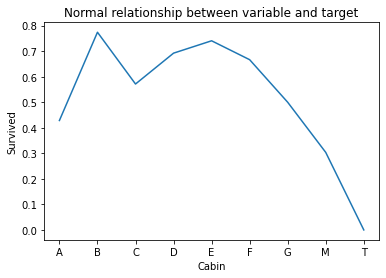

In [98]:
# Plot the original variable
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
fig = X_train.groupby(['Cabin'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

Text(0, 0.5, 'Survived')

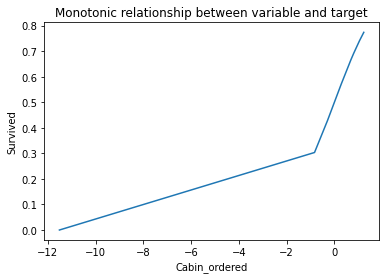

In [99]:
# Plot the transformed result: the monotonic variable

fig = plt.figure()
fig = X_train.groupby(['Cabin_ordered'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between variable and target')
fig.set_ylabel('Survived')

As you can see in the above plot, there is now a monotonic relationship between the variable Cabin and probability of survival. The higher the Cabin number, the more likely the person was to survive.Monotonic does not mean strictly linear. Monotonic means that it increases constantly, or it decreases constantly.
## Rare Label encoding<a id="333"></a> <br>
**Labels that occur rarely**

Categorical variables are those which values are selected from a group of categories, also called labels. It is not unusual that different labels appear in  the dataset with different frequencies. Some categories may appear a lot in the dataset, whereas some other categories appear only in a few number of observations.

Consider for example a dataset with information about loan applicants for the Lending Club data exercise where one of the variables is "city where the applicant lives". We can imagine that cities like 'New York' may appear a lot in the data set just because New York has a huge population. On the other hand, smaller towns like 'Leavenworth' will appear only on a few occasions (if at all, population < 2000 people), just because the population there is very small.

Categorical variables in business datasets very often contain a few dominant labels that account for the majority of the observations and a large number of labels that appear only seldomly. 

**Are Rare Labels in a categorical variable a problem?**

Rare values can add a lot of information at the time of making an assessment or none at all. For example, consider a stockholder meeting where each person can vote in proportion to their number of shares. One of the shareholders owns 50% of the stock, and the other 999 shareholders own the remaining 50%. The outcome of the vote is largely influenced by the shareholder who holds the majority of the stock. The remaining shareholders may have an impact collectively, but they have virtually no impact individually. 

The same occurs in real life datasets. The label that is over-represented in the dataset tends to dominate the outcome, and those that are under-represented may have no impact individually, but could have an impact if considered collectively.

More specifically,

- Rare values in categorical variables tend to cause over-fitting, particularly in tree based methods.

- A big number of infrequent labels adds noise, with little information, therefore causing over-fitting.

- Rare labels may be present in training set, but not in test set, therefore causing over-fitting to the train set.

- Rare labels may appear in the test set, and not in the train set. Thus, the machine learning model will not know how to evaluate it. 


**Note** Sometimes rare values, like outliers, are worth having a look at, in particular, when we are looking for rare instances (e.g., when the target is highly unbalanced). For example, if we are building a model to predict fraudulent applications, which are in essence rare, then a rare value in a certain variable, may be indeed important. This rare value could be telling us that the observation is most likely a fraudulent application, and therefore we would choose not to ignore it.
So, let's go ahead and see the effect of Rare Values in Categorical variables on Machine Learning models.

In [100]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [101]:
data = pd.read_csv('../input/titanic/train.csv', usecols=['Embarked', 'Survived'])
data.head()

,Survived,Embarked
0,0,S
1,1,C
2,1,S
3,1,S
4,0,S


In [102]:
# let's check at the different number of labels within each variable
cols_to_use = ['Embarked']

for col in cols_to_use:
    print('Variable: ', col, ' Number of Labels: ', len(data[col].unique()))
    
print('Total passengers: ', len(data))

Variable:  Embarked  Number of Labels:  4
Total passengers:  891


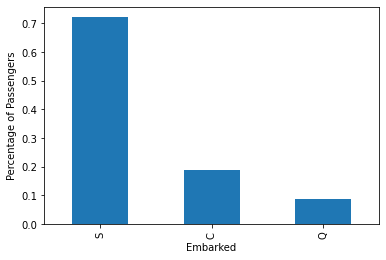

In [103]:
# let's plot how frequently appears each label within a variable in the dataset

total_passengers = len(data)

for col in cols_to_use:
    # count the number of observations per label and divide by total 
    # number of cars
    temp_df = pd.Series(data[col].value_counts() / total_passengers)
    
    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)
    fig.set_ylabel('Percentage of Passengers')
    plt.show()

We can see that for each variables, 2 labels appear in more than 10% of the cars in the dataset, and one label appear in less than 10%  the passengers. **These are infrequent labels or Rare Values and could cause over-fitting.**

### How is the target, "time to pass testing", related to these categories?

In [104]:
# I will work first the the variable Embarked

# Let's calculate again the frequency of the different categories/labels in Embarked

temp_df = pd.Series(data['Embarked'].value_counts() / total_passengers).reset_index()
temp_df.columns = ['Embarked', 'Percentage of Passengers']
temp_df

,Embarked,Percentage of Passengers
0,S,0.72
1,C,0.19
2,Q,0.09


In [105]:
# Now let's calculate the mean "time to pass testing" for each label in Embarked

data.groupby(['Embarked'])['Survived'].mean().reset_index()

,Embarked,Survived
0,C,0.55
1,Q,0.39
2,S,0.34


## LeaveOneOut<a id="334"></a> <br>
It is very similar to target but avoids contamination. Nominal, ordinal. For classification tasks.
Leave One Out encoding essentially calculates the mean of the target variables for all the records containing the same value for the categorical feature variable in question. The encoding algorithm is slightly different between training and test data set. For training data set, the record under consideration is left out, hence the name Leave One Out. The encoding is as follows for certain value of a certain categorical variable.

ci = (Σj != i tj / (n – 1 + R)) x (1 + εi)   where
ci = encoded value for ith record
tj = target variable value for jth record
n = number of records with the same categorical variable value
R = regularization factor
εi = zero mean random variable with normal distribution N(0, s)

For validation data or prediction data set, the definition is slightly different. We don’t need to leave the current record out and we don’t need the randomness factor. It’s simpler definition is as below

ci = (Σj tj / (n + R))    where
ci = encoded value for ith record
tj = target variable value for jth record
n = number of records with the same categorical variable value
R = regularization factor

For validation data set, we don’t leave the current record out. As we will see later, all the statistics about target variable for each value of each categorical variable as calculated for the training data set is saved and then used for validation and prediction data set.

The factor R acts as a regularizer. When the support is low for a particular value of variable i.e when n is low, then the encoded value is not reliable. Regularization factor R remedies the problem. It also ensures that the denominator is always positive for training data set.

In [106]:
ce_leave = ce.LeaveOneOutEncoder(cols = ['Embarked'])
ce_leave.fit(X, y)        
ce_leave.transform(X, y)         

,Embarked
0,0.34
1,0.55
2,0.34
3,0.34
4,0.34
...,...
886,0.34
887,0.34
888,0.34
889,0.55


## James-Stein<a id="335"></a> <br>

**James-Stein estimator.**

    For feature value `i`, James-Stein estimator returns a weighted average of:
        1. The mean target value for the observed feature value `i`.
        2. The mean target value (regardless of the feature value).
    This can be written as::
        JS_i = (1-B)*mean(y_i) + B*mean(y)
    The question is, what should be the weight `B`?
    If we put too much weight on the conditional mean value, we will overfit.
    If we put too much weight on the global mean, we will underfit.
    The canonical solution in machine learning is to perform cross-validation.
    However, Charles Stein came with a closed-form solution to the problem.
    The intuition is: If the estimate of `mean(y_i)` is unreliable (`y_i` has high variance),
    we should put more weight on `mean(y)`. Stein put it into an equation as::
        B = var(y_i) / (var(y_i)+var(y))
    The only remaining issue is that we do not know `var(y)`, let alone `var(y_i)`.
    Hence, we have to estimate the variances. But how can we reliably estimate the
    variances, when we already struggle with the estimation of the mean values?!
    There are multiple solutions:
        1. If we have the same count of observations for each feature value `i` and all
        `y_i` are close to each other, we can pretend that all `var(y_i)` are identical.
        This is called a pooled model.
        2. If the observation counts are not equal, it makes sense to replace the variances
        with squared standard errors, which penalize small observation counts::
            SE^2 = var(y)/count(y)
        This is called an independent model.
    James-Stein estimator has, however, one practical limitation - it was defined
    only for normal distributions. If you want to apply it for binary classification,
    which allows only values {0, 1}, it is better to first convert the mean target value
    from the bound interval <0,1> into an unbounded interval by replacing mean(y)
    with log-odds ratio::
        log-odds_ratio_i = log(mean(y_i)/mean(y_not_i))
    This is called binary model. The estimation of parameters of this model is, however,
    tricky and sometimes it fails fatally. In these situations, it is better to use beta
    model, which generally delivers slightly worse accuracy than binary model but does
    not suffer from fatal failures.
   
    Parameters
    ----------
    verbose: int
        integer indicating verbosity of the output. 0 for none.
    cols: list
        a list of columns to encode, if None, all string columns will be encoded.
    drop_invariant: bool
        boolean for whether or not to drop encoded columns with 0 variance.
    return_df: bool
        boolean for whether to return a pandas DataFrame from transform (otherwise it will be a numpy array).
    handle_missing: str
        options are 'return_nan', 'error' and 'value', defaults to 'value', which returns the prior probability.
    handle_unknown: str
        options are 'return_nan', 'error' and 'value', defaults to 'value', which returns the prior probability.
    model: str
        options are 'pooled', 'beta', 'binary' and 'independent', defaults to 'independent'.
    randomized: bool,
        adds normal (Gaussian) distribution noise into training data in order to decrease overfitting (testing data are untouched).
    sigma: float
        standard deviation (spread or "width") of the normal distribution.

In [107]:
ce_James = ce.JamesSteinEncoder(cols = ['Embarked'])
ce_James.fit(X, y)        
ce_James.transform(X, y)   

,Embarked
0,0.34
1,0.52
2,0.34
3,0.34
4,0.34
...,...
886,0.34
887,0.34
888,0.34
889,0.52


## M-estimator<a id="336"></a> <br>

**M-probability estimate of likelihood.**
    This is a simplified version of target encoder, which goes under names like m-probability estimate or
    additive smoothing with known incidence rates. In comparison to target encoder, m-probability estimate
    has only one tunable parameter (`m`), while target encoder has two tunable parameters (`min_samples_leaf`
    and `smoothing`).
    
    Parameters
    ----------
    verbose: int
        integer indicating verbosity of the output. 0 for none.
    cols: list
        a list of columns to encode, if None, all string columns will be encoded.
    drop_invariant: bool
        boolean for whether or not to drop encoded columns with 0 variance.
    return_df: bool
        boolean for whether to return a pandas DataFrame from transform (otherwise it will be a numpy array).
    handle_missing: str
        options are 'return_nan', 'error' and 'value', defaults to 'value', which returns the prior probability.
    handle_unknown: str
        options are 'return_nan', 'error' and 'value', defaults to 'value', which returns the prior probability.
    randomized: bool,
        adds normal (Gaussian) distribution noise into training data in order to decrease overfitting (testing data are untouched).
    sigma: float
        standard deviation (spread or "width") of the normal distribution.
    m: float
        this is the "m" in the m-probability estimate. Higher value of m results into stronger shrinking.
        M is non-negative.

In [108]:
ce_M_Estimator = ce.MEstimateEncoder(cols = ['Embarked'])
ce_M_Estimator.fit(X, y)        
ce_M_Estimator.transform(X, y)   

,Embarked
0,0.34
1,0.55
2,0.34
3,0.34
4,0.34
...,...
886,0.34
887,0.34
888,0.34
889,0.55


# 4. Gaussian Transformation <a id="4"></a> <br>

Some machine learning models like linear and logistic regression assume that the variables are normally distributed. Others benefit from "Gaussian-like" distributions, as in such distributions the observations of X available to predict Y vary across a greater range of values. Thus, Gaussian distributed variables may boost the machine learning algorithm performance.

If a variable is not normally distributed, sometimes it is possible to find a mathematical transformation so that the transformed variable is Gaussian.

How can we transform variables so that they follow a Gaussian distribution?

There are a few straightforward methods to transform variables so that they follow a Gaussian distribution. None of them is better than the other, they rather depend on the original distribution of the variables. They are:

* Logarithmic Transformation
* Reciprocal Transformation
* Square Root Transformation
* Exponential Transformation 
* Boxcox Transformation

Let us take the titanic dataset

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab 
import scipy.stats as stats
# load the numerical variables of the Titanic Dataset

train_data = pd.read_csv('../input/titanic/train.csv', usecols = ['Age', 'Fare', 'Survived'])
train_data.head()

,Survived,Age,Fare
0,0,22.00,7.25
1,1,38.00,71.28
2,1,26.00,7.92
3,1,35.00,53.10
4,0,35.00,8.05


In [110]:
# first fill the missing data of the variable age, with a random sample of the variable

def impute_na(data, variable):
    # function to fill na with a random sample
    df = data.copy()
    
    # random sampling
    df[variable+'_random'] = df[variable]
    
    # extract the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    
    return df[variable+'_random']

In [111]:
# fill nul values for Age
train_data['Age'] = impute_na(train_data, 'Age')

To visualise the distribution of the variable, Age in this case, we plot a histogram to visualise a bell-shape, and the Q-Qplot. Remember that if the variable is normally distributed, we should see a 45 degree straight line of the values over the theoretical quantiles. See the lecture "Variable Distribution" on section 4 for a description of Q-Q plots.

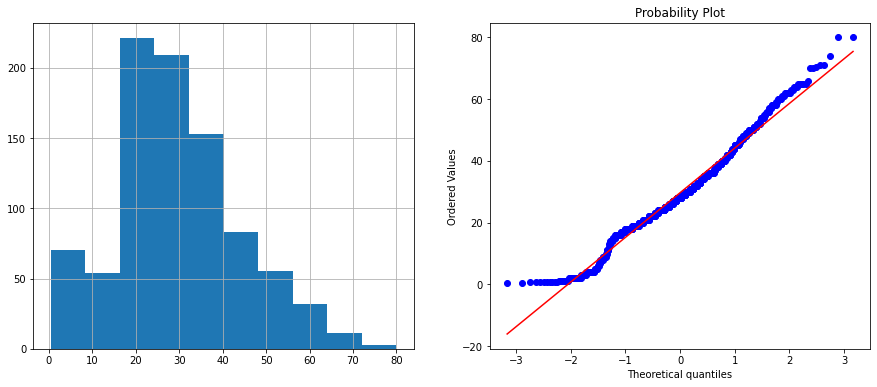

In [112]:
# Plot the histograms to have a quick look at the distributions and  plot Q-Q plots to visualise if the variable is normally distributed

def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)

    plt.show()
    
diagnostic_plots(train_data, 'Age')


The variable Age is almost normally distributed, except for some observations on the lower value tail of the distribution. Note the slight skew to the left in the histogram, and the deviation from the straight line towards the lower values ont he Q-Q- plot. In the following cells, I will apply the above mentioned transformations and compare the distributions of the transformed Age.

## 1. Logarithmic Transformation<a id="41"></a> <br>
The log transformation is, arguably, the most popular among the different types of transformations used to transform skewed data to approximately conform to normality. If the original data follows a log-normal distribution or approximately so, then the log-transformed data follows a normal or near normal distribution.

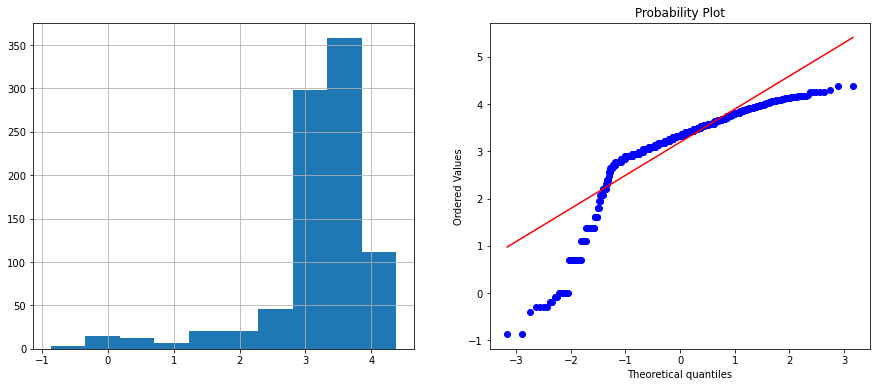

In [113]:
train_data['Age_log'] = np.log(train_data.Age)
diagnostic_plots(train_data, 'Age_log')

## 2. Reciprocal transformation <a id="42"></a> <br>	

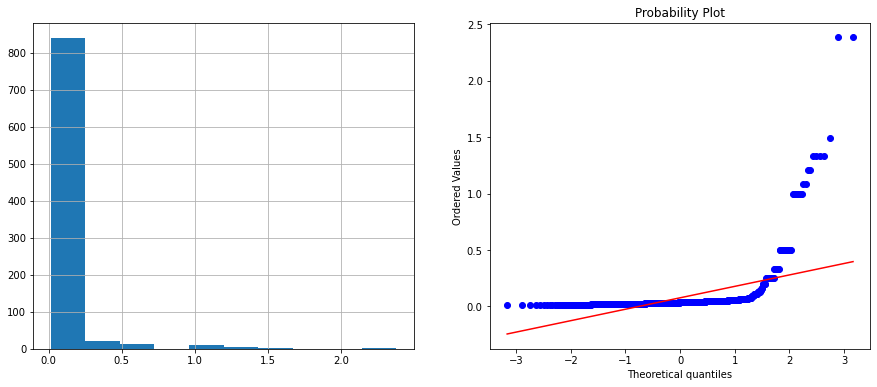

In [114]:
train_data['Age_reciprocal'] = 1 / train_data.Age
diagnostic_plots(train_data, 'Age_reciprocal')

The reciprocal transformation was also not useful to transform Age into a variable normally distributed.

## 3. Square root transformation<a id="43"></a> <br>

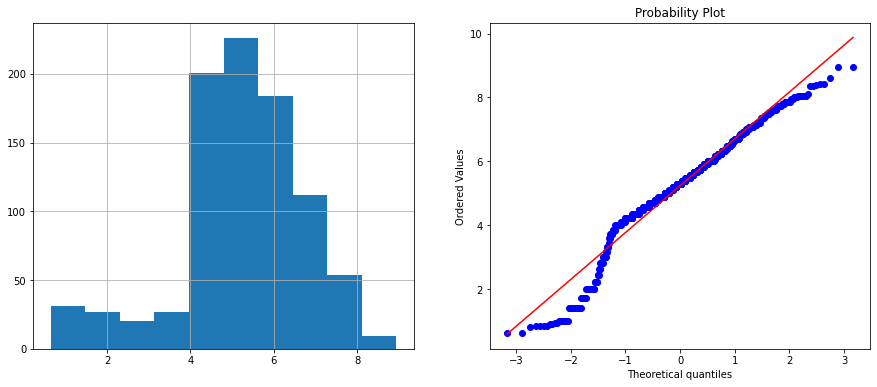

In [115]:
train_data['Age_sqr'] =train_data.Age**(1/2)
diagnostic_plots(train_data, 'Age_sqr')

The square root transformation is a bit more succesful that the previous2 transformations, however, the variable is still not Gaussian, and this does not represent an improvement towards normality respect the original distribution of Age.
## 4. Exponential transformation<a id="44"></a> <br>

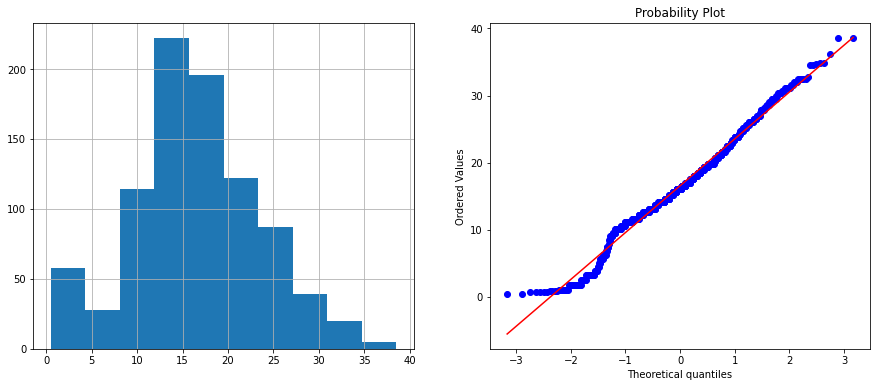

In [116]:
train_data['Age_exp'] = train_data.Age**(1/1.2) 
diagnostic_plots(train_data, 'Age_exp')

The exponential transformation is the best of all the transformations above, at the time of generating a variable that is normally distributed. Comparing the histogram and Q-Q plot of the exponentially transformed Age with the original distribution, I would say that by visual inspection the transformed variable follows more closely a Gaussian distribution. 
Should I transform the variable?
It depends on what we are trying to achieve. If this was a situation in a business setting, I would use the original variable without transformation to train the model, as this would represent a simpler situation at the time of asking developers to implement the model in real life, and also it will be easier to interpret. If on the other hand this was an exercise to win a data science competition, I would opt to use the variable that gives me the highest performance.
## 5. Yeo-Johnson Transformation<a id="45"></a> <br>	



Optimal λ:  0.7611616343881625


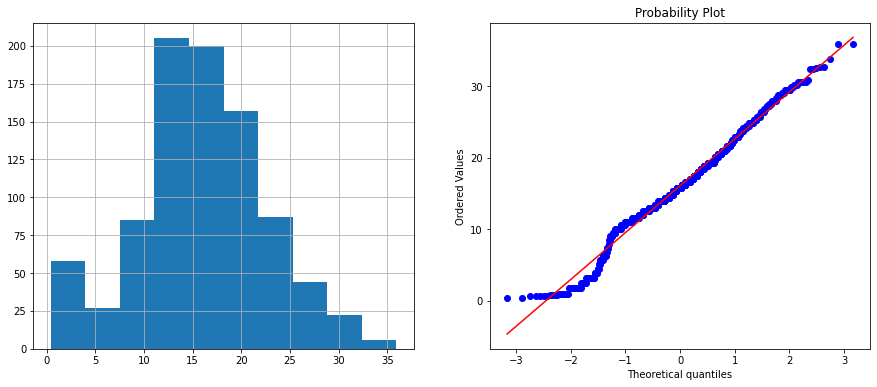

In [117]:
train_data['Age_yeojohnson'], param = stats.yeojohnson(train_data.Age) 
print('Optimal λ: ', param)
diagnostic_plots(train_data, 'Age_yeojohnson')

## 6. Box-Cox Transformation<a id="46"></a> <br>
The Box-Cox transformation is defined as: 

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. 
λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

Briefly, for each λ (the transformation tests several λs), the correlation coefficient of the Probability Plot (Q-Q plot below, correlation between ordered values and theoretical quantiles) is calculated. The value of λ corresponding to the maximum correlation on the plot is then the optimal choice for λ.In python, we can evaluate and obtain the best λ with the stats.boxcox function from the package scipy.

Let's have a look.

Optimal λ:  0.7648522500282625


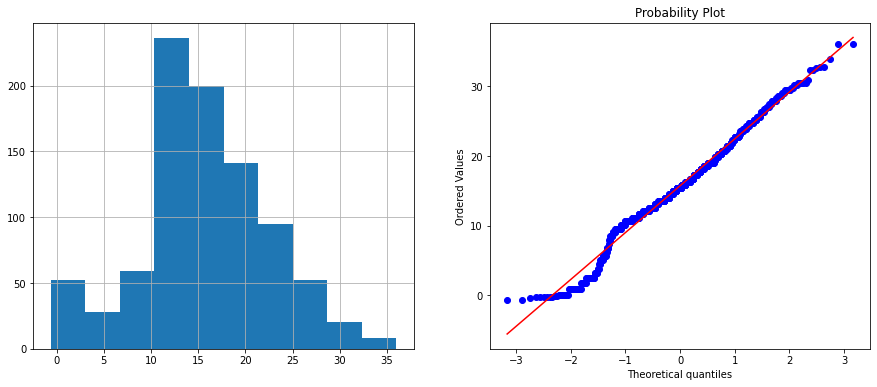

In [118]:
train_data['Age_boxcox'], param = stats.boxcox(train_data.Age) 
print('Optimal λ: ', param)
diagnostic_plots(train_data, 'Age_boxcox')

 <a id="5"></a> <br>
# 5. Discretisation

**Discretisation** refers to sorting the values of the variable into bins or intervals, also called buckets. There are multiple ways to discretise variables:

![](https://thesaurus.plus/img/synonyms/408/discretization.png)

**Discretisation approaches:**

There are several approaches to transform continuous variables into discrete ones. This process is also known as binning, with each bin being each interval.
**
Discretisation methods fall into 2 categories: supervised and unsupervised. 
**
**Unsupervised methods** do not use any information, other than the variable distribution, to create the contiguous bins in which the values will be placed. 

**Supervised methods** typically use target information in order to create the bins or intervals.

**Unsupervised discretisation methods**

* Equal width binning
* Equal frequency binning

**Supervised discretisation methods**

* Discretisation using decision trees


![](https://www.python-course.eu/images/binning.png)
Data binning, which is also known as bucketing or discretization, is a technique used in data processing and statistics. Binning can be used for example, if there are more possible data points than observed data points. 

An example is to bin the body heights of people into intervals or categories. Let us assume, we take the heights of 30 people. The length values can be between - roughly guessing - 1.30 metres to 2.50 metres. Theoretically, there are 120 different cm values possible, but we can have at most 30 different values from our sample group. One way to group them could be to put the measured values into bins ranging from 1.30 - 1.50 metres, 1.50 - 1.70 metres, 1.70 - 1.90 metres and so on. This means that the original data values, will be assigned to a bin into wich they fit according to their size. The original values will be replaced by values representing the corresponding intervals. 

Binning is a form of quantization.Bins do not necessarily have to be numerical, they can be categorical values of any kind, like "dogs", "cats", "hamsters", and so on.

Binning is also used in image processing, binning. It can be used to reduce the amount of data, by combining neighboring pixel into single pixels. kxk binning reduces areas of k x k pixels into single pixel.


## 1. Equal Width Discretisation<a id="51"></a> <br>	
Equal width binning divides the scope of possible values into N bins of the same width.The width is determined by the range of values in the variable and the number of bins we wish to use to divide the variable.

width = (max value - min value) / N

For example if the values of the variable vary between 0 and 100, we create 5 bins like this: width = (100-0) / 5 = 20. The bins thus are 0-20, 20-40, 40-60, 80-100. The first and final bins (0-20 and 80-100) can be expanded to accommodate outliers (that is, values under 0 or greater than 100 would be placed in those bins as well).
There is no rule of thumb to define N. Typically, we would not want more than 10.

I will demonstrate how to perform equal width binning using the Titanic dataset.

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
equal_width_data = pd.read_csv('../input/titanic/train.csv', usecols = ['Age', 'Fare', 'Survived'])
equal_width_data.head()

,Survived,Age,Fare
0,0,22.00,7.25
1,1,38.00,71.28
2,1,26.00,7.92
3,1,35.00,53.10
4,0,35.00,8.05


In [120]:
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(equal_width_data[['Age', 'Fare', 'Survived']], equal_width_data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 3), (268, 3))

In [121]:
# replace NA in both  train and test sets

X_train['Age'] = impute_na(equal_width_data, 'Age')
X_test['Age'] = impute_na(equal_width_data, 'Age')

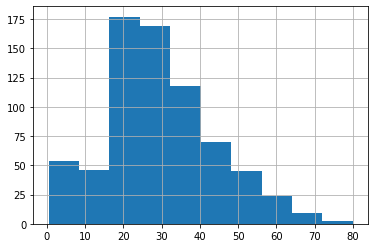

In [122]:
# Let us remind ourselves of the distribution of Age
equal_width_data.Age.hist()

How does survival correlate with Age?

We can determine the relation between survival and Age by plotting the mean survival per Age. In this case, I will calculate the Survival rate per each year of Age. See below.

Text(0, 0.5, 'Survived')

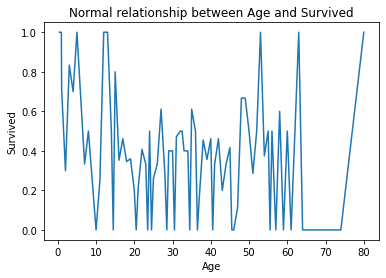

In [123]:
fig = plt.figure()
fig = equal_width_data.groupby(['Age'])['Survived'].mean().plot()
fig.set_title('Normal relationship between Age and Survived')
fig.set_ylabel('Survived')


By looking at the plot, we get an intuition that younger people (children) were more likely to survive (see higher survival rates at ages below 10 and 10-15). However, it looks like children of 10 years of age, had a very low survival chance. This does not make a lot of sense and most likely indicates that our 10 year old sample is not big enough and then the survival rate is underestimated. Let's see below.

Text(0, 0.5, 'Survived')

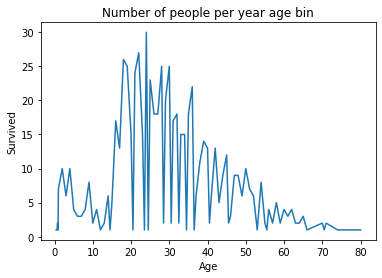

In [124]:
fig = plt.figure()
fig = equal_width_data.groupby(['Age'])['Survived'].count().plot()
fig.set_title('Number of people per year age bin')
fig.set_ylabel('Survived')

As we suspected, there were very few children at the age of 10 on the Titanic. If none of them or only half of the 10 year old children survived, we would be led to think that being 10 years old decreased your chances of survival, when in reality, there were only 2 children of the age that were not lucky enough  to survive, therefore leading to underestimation of survival rate.

By grouping Age into bins, we can get a better view of the survival rate depending on the Age of the passenger. Let's see below.



In [125]:
# Let us capture the range of the variable age to begin with

Age_range = X_train.Age.max() - X_train.Age.min()
Age_range

79.58

In [126]:
# Now let us capture the lower and upper boundaries

min_value = int(np.floor(X_train.Age.min()))
max_value = int(np.ceil(X_train.Age.max()))

# let's round the bin width
inter_value = int(np.round(Age_range/10))

min_value, max_value, inter_value

(0, 80, 8)

In [127]:
# Let us capture the interval limits, so we can pass them to the pandas cut function to generate the bins

intervals = [i for i in range(min_value, max_value+inter_value, inter_value)]
intervals

[0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80]

In [128]:
# let's make labels to label the different bins
labels = ['Bin_'+str(i) for i in range(1,len(intervals))]
labels

['Bin_1',
 'Bin_2',
 'Bin_3',
 'Bin_4',
 'Bin_5',
 'Bin_6',
 'Bin_7',
 'Bin_8',
 'Bin_9',
 'Bin_10']

In [129]:
# create Binned age groups

# create one column with labels
X_train['Age_disc_labels'] = pd.cut(x = X_train.Age, bins=intervals, labels=labels, include_lowest=True)

# and one with bin boundaries
X_train['Age_disc'] = pd.cut(x = X_train.Age, bins=intervals, include_lowest=True)

X_train.head()

,Age,Fare,Survived,Age_disc_labels,Age_disc
857,51.00,26.55,1,Bin_7,"(48.0, 56.0]"
52,49.00,76.73,1,Bin_7,"(48.0, 56.0]"
386,1.00,46.90,0,Bin_1,"(-0.001, 8.0]"
124,54.00,77.29,0,Bin_7,"(48.0, 56.0]"
578,19.00,14.46,0,Bin_3,"(16.0, 24.0]"


We can see in the above output how by discretising using equal width, we placed each Age observation within one interval /bin. For example, age 51 was placed in the 48-56 interval, whereas age 14.5 was placed into the 8-16 interval.
Because we discretised the variable using equal width intervals instead of equal frequency, there won't necessarily be the same amount of passengers in each of the intervals. See below.

In [130]:
X_train.groupby('Age_disc')['Age'].count()

Age_disc
(-0.001, 8.0]     52
(8.0, 16.0]       34
(16.0, 24.0]     146
(24.0, 32.0]     145
(32.0, 40.0]     116
(40.0, 48.0]      62
(48.0, 56.0]      34
(56.0, 64.0]      24
(64.0, 72.0]       8
(72.0, 80.0]       2
Name: Age, dtype: int64

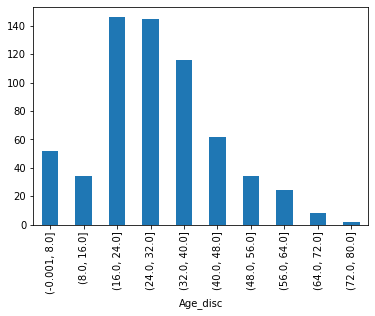

In [131]:
X_train.groupby('Age_disc')['Age'].count().plot.bar()

The majority of people on the Titanic were between 16-40 years of age.

Now, we can discretise Age in the test set, using the same interval boundaries that we calculated for the train set. See below.

In [132]:
X_test['Age_disc_labels'] = pd.cut(x = X_test.Age, bins=intervals, labels=labels, include_lowest=True)
X_test['Age_disc'] = pd.cut(x = X_test.Age, bins=intervals,  include_lowest=True)

X_test.head()

,Age,Fare,Survived,Age_disc_labels,Age_disc
495,24.00,14.46,0,Bin_3,"(16.0, 24.0]"
648,21.00,7.55,0,Bin_3,"(16.0, 24.0]"
278,7.00,29.12,0,Bin_1,"(-0.001, 8.0]"
31,31.00,146.52,1,Bin_4,"(24.0, 32.0]"
255,29.00,15.25,1,Bin_4,"(24.0, 32.0]"


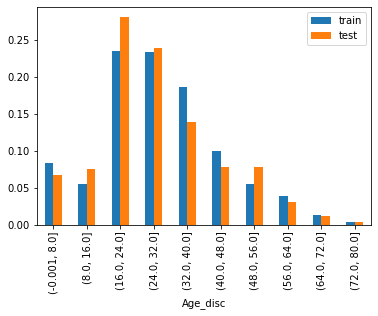

In [133]:
# If the distributions in train and test set are similar, we should expect similar distribution of observations in the different intervals in the train and test set.

t1 = X_train.groupby(['Age_disc'])['Survived'].count() / np.float(len(X_train))
t2 = X_test.groupby(['Age_disc'])['Survived'].count() / np.float(len(X_test))
temp = pd.concat([t1,t2], axis=1)
temp.columns = ['train', 'test']
temp.plot.bar()


Indeed, the proportion of passengers within each bin is roughly the same.

Text(0, 0.5, 'Survived')

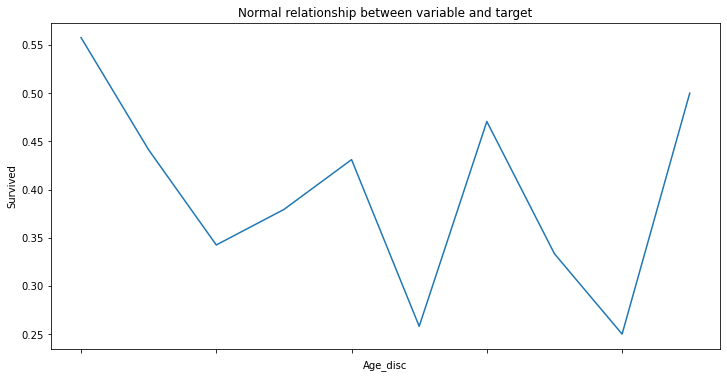

In [134]:
# Now let's observe the relationship between age and surival again, using the discrete Age transformed variable

fig = plt.figure()
fig = X_train.groupby(['Age_disc'])['Survived'].mean().plot(figsize=(12,6))
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

Text(0, 0.5, 'No of Passengers')

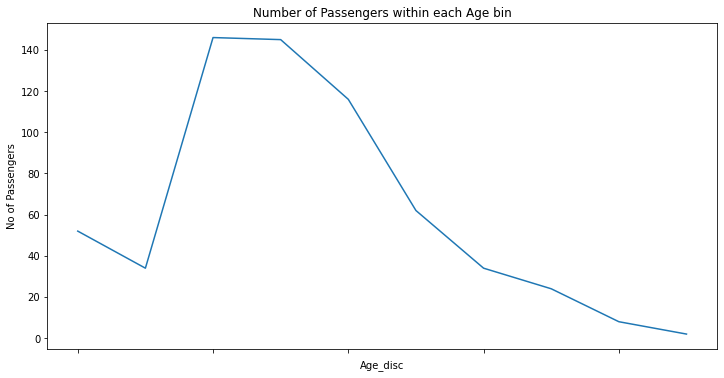

In [135]:
fig = plt.figure()
fig = X_train.groupby(['Age_disc'])['Survived'].count().plot(figsize=(12,6))
fig.set_title('Number of Passengers within each Age bin')
fig.set_ylabel('No of Passengers')

In this case, by dividing Age into bins, we removed some of the noise plotted in the previous graph (a few cells ago) using the untransformed Age. Using the discrete variable Age, we observe as expected that children (<16) had the highest survival chance.

What happens to older people is less clear from the discrete variable. It looks like people between 32-40 and 48-56 are more likely to survive, than people from 40-48. This might or might not be true and more research would be needed to determine if this was the case, what the reason behind it was. In addition, it looks like being extremely old, was very favourable for survival (look at the 72-80 bucket). However, most likely, these are consequences of an arbitrary binning strategy. There are very few people in the bucket 72-80, and thus, the fact that 1 of them survived inflates (overestimates) the survival rate for that bucket. And the same is true for the remaining of the bins, the lowest the amount of observations within buckets, the highest the risk of over or underestimating the target (survival in this case). So we begin to see some of the consequences of this binning strategy.

## 2. Equal Frequency Discretisation<a id="52"></a> <br>

Equal frequency binning divides the scope of possible values of the variable into N bins, where each bin carries the same amount of observations. This is particularly useful for skewed variables as it spreads the observations over the different bins equally. Typically, we find the interval boundaries by determining the quantiles.

Equal frequency discretisation using quantiles consists of dividing the continuous variable into N quantiles, N to be defined by the user. There is no rule of thumb to define N. However, if we think of the discrete variable as a categorical variable, where each bin is a category, we would like to keep N (the number of categories) low (typically no more than 10).

Equal frequency binning is straightforward to implement and by spreading the values of the observations more evenly it may help boost the algorithm's performance. On the other hand, this arbitrary binning may also disrupt the relationship with the target on occasions. Therefore, whenever possible, it will bring value to examine whether this type of binning is the right strategy, and it will depend on the variable and the algorithm that we want to use to make the predictions.

I will demonstrate how to perform equal frequency binning using the Titanic dataset.

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
equal_freq_data= pd.read_csv('../input/titanic/train.csv', usecols = ['Age', 'Fare', 'Survived'])
equal_freq_data.head()

,Survived,Age,Fare
0,0,22.00,7.25
1,1,38.00,71.28
2,1,26.00,7.92
3,1,35.00,53.10
4,0,35.00,8.05


In [137]:
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(equal_freq_data[['Age', 'Fare', 'Survived']],equal_freq_data.Survived, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((623, 3), (268, 3))

In [138]:
# replace NA in both train and test sets

X_train['Age'] = impute_na(equal_freq_data, 'Age')
X_test['Age'] = impute_na(equal_freq_data, 'Age')

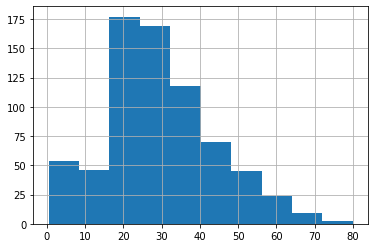

In [139]:
# let's remind ourselves of the original distribution

equal_freq_data.Age.hist()

In [140]:
# We will divide Age in 5 bins. I use the qcut (quantile cut) function from pandas and I indicate that I want 4 cutting points, thus 5 bins. retbins= True indicates that I want to capture the limits of each interval (so I can then use them to cut the test set)

Age_disccretised, intervals = pd.qcut(equal_freq_data.Age, 4, labels=None, retbins=True, precision=3, duplicates='raise')
pd.concat([Age_disccretised, equal_freq_data.Age], axis=1).head(10)

,Age,Age
0,"(20.125, 28.0]",22.00
1,"(28.0, 38.0]",38.00
2,"(20.125, 28.0]",26.00
3,"(28.0, 38.0]",35.00
4,"(28.0, 38.0]",35.00
5,NaN,nan
6,"(38.0, 80.0]",54.00
7,"(0.419, 20.125]",2.00
8,"(20.125, 28.0]",27.00
9,"(0.419, 20.125]",14.00


We can see in the above output how by discretising using quantiles, we placed each Age observation within one interval. For example, age 22 was placed in the 20-28 interval, whereas age 38 was placed into the 28-28 interval. We can visualise the interval cut points below.

In [141]:
intervals

array([ 0.42 , 20.125, 28.   , 38.   , 80.   ])

And because we generated the bins using the quantile cut method, we should have roughly the same amount of observations per bin. See below.

In [142]:
# Calculate number of passengers per bin
temp = pd.concat([Age_disccretised, equal_freq_data.Age], axis=1)
temp.columns = ['Age_discretised', 'Age']
temp.groupby('Age_discretised')['Age'].count()

Age_discretised
(0.419, 20.125]    179
(20.125, 28.0]     183
(28.0, 38.0]       175
(38.0, 80.0]       177
Name: Age, dtype: int64

In [143]:
# We can also add labels instead of having the interval boundaries, to the bins, as follows:

Age_disccretised, intervals = pd.qcut(equal_freq_data.Age, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'], retbins=True, precision=3, duplicates='raise')
Age_disccretised.head()

0    Q2
1    Q3
2    Q2
3    Q3
4    Q3
Name: Age, dtype: category
Categories (4, object): [Q1 < Q2 < Q3 < Q4]

In [144]:
# We will divide into 10 quantiles for the rest of the exercise. I will leave the quantile boundary and generate labels as well for comparison

# create 10 labels, one for each quantile

labels = ['Q'+str(i+1) for i in range(0,10)]
print(labels)

# bins with labels
X_train['Age_disc_label'], bins = pd.qcut(x=X_train.Age, q=10, labels=labels, retbins=True, precision=3, duplicates='raise')

# bins with boundaries
X_train['Age_disc'], bins = pd.qcut(x=X_train.Age, q=10, retbins=True, precision=3, duplicates='raise')


X_train.head(10)

['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']


,Age,Fare,Survived,Age_disc_label,Age_disc
857,51.00,26.55,1,Q10,"(50.0, 80.0]"
52,49.00,76.73,1,Q9,"(41.0, 50.0]"
386,1.00,46.90,0,Q1,"(0.419, 12.2]"
124,54.00,77.29,0,Q10,"(50.0, 80.0]"
578,19.00,14.46,0,Q2,"(12.2, 19.0]"
549,8.00,36.75,1,Q1,"(0.419, 12.2]"
118,24.00,247.52,0,Q4,"(22.0, 26.0]"
12,20.00,8.05,0,Q3,"(19.0, 22.0]"
157,30.00,8.05,0,Q6,"(29.0, 32.0]"
127,24.00,7.14,1,Q4,"(22.0, 26.0]"



Age 51 was placed into the 49-80 bucket, which is also the last bucket (Q10) in our distribution, as it contains the majority of the elder people. The age of 8 was placed into the 0-13 bucket, which is the first interval (Q1) of the discretised variable. And below the interval limits.


To divide the test set, we will use the cut method of pandas, and we will pass the interval edges above. 
As with all feature engineering methods, the limits of the intervals should be set on the training set, and then propagated to the test set. We should not calculate the quantiles in the test set. We should use the limits estimated using the train set data. If the distributions are similar, we should expect to have roughly the same amount of observations in each age bucket in the test set as well.

In [145]:
X_test['Age_disc_label'] = pd.cut(x = X_test.Age, bins=bins, labels=labels)
X_test['Age_disc'] = pd.cut(x = X_test.Age, bins=bins)

X_test.head()

,Age,Fare,Survived,Age_disc_label,Age_disc
495,24.00,14.46,0,Q4,"(22.0, 26.0]"
648,21.00,7.55,0,Q3,"(19.0, 22.0]"
278,7.00,29.12,0,Q1,"(0.42, 12.2]"
31,31.00,146.52,1,Q6,"(29.0, 32.0]"
255,29.00,15.25,1,Q5,"(26.0, 29.0]"


In [146]:
# let's check that we have equal frequency (equal number of observations per bin)
X_test.groupby('Age_disc')['Age'].count()

Age_disc
(0.42, 12.2]    22
(12.2, 19.0]    44
(19.0, 22.0]    27
(22.0, 26.0]    39
(26.0, 29.0]    22
(29.0, 32.0]    22
(32.0, 36.0]    21
(36.0, 41.0]    19
(41.0, 50.0]    25
(50.0, 80.0]    26
Name: Age, dtype: int64

**Discretisation by quantiles guarantees same number of observations in each partition/bin/interval**


In [147]:
t1 = X_train.groupby(['Age_disc'])['Survived'].count() / np.float(len(X_train))
t1

Age_disc
(0.419, 12.2]   0.10
(12.2, 19.0]    0.11
(19.0, 22.0]    0.10
(22.0, 26.0]    0.11
(26.0, 29.0]    0.10
(29.0, 32.0]    0.08
(32.0, 36.0]    0.12
(36.0, 41.0]    0.07
(41.0, 50.0]    0.11
(50.0, 80.0]    0.09
Name: Survived, dtype: float64

In [148]:
t2 = X_test.groupby(['Age_disc'])['Survived'].count() / np.float(len(X_test))
t2

Age_disc
(0.42, 12.2]   0.08
(12.2, 19.0]   0.16
(19.0, 22.0]   0.10
(22.0, 26.0]   0.15
(26.0, 29.0]   0.08
(29.0, 32.0]   0.08
(32.0, 36.0]   0.08
(36.0, 41.0]   0.07
(41.0, 50.0]   0.09
(50.0, 80.0]   0.10
Name: Survived, dtype: float64

In [149]:
temp = pd.concat([t1,t2], axis=1)
temp.columns = ['train', 'test']
temp

,train,test
Age_disc,,
"(0.419, 12.2]",0.10,nan
"(0.42, 12.2]",nan,0.08
"(12.2, 19.0]",0.11,0.16
"(19.0, 22.0]",0.10,0.10
"(22.0, 26.0]",0.11,0.15
"(26.0, 29.0]",0.10,0.08
"(29.0, 32.0]",0.08,0.08
"(32.0, 36.0]",0.12,0.08
"(36.0, 41.0]",0.07,0.07


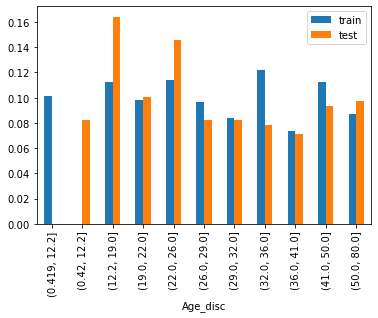

In [150]:
temp.plot.bar()

Text(0, 0.5, 'Survived')

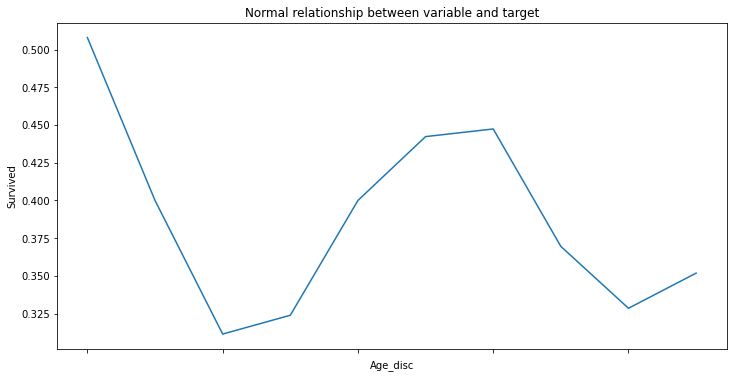

In [151]:
# Let's observe the relationship between age and survival again, using the discrete Age transformed variable

fig = plt.figure()
fig = X_train.groupby(['Age_disc'])['Survived'].mean().plot(figsize=(12,6))
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

Using discretisation we capture more clearly the survival rate according to the age of the passenger. We can see that children (<18) were the most likely to survive, and people in the early 30s as well, potentially mother with children, whereas people between 20-30 and older than 35 were the less likely to survive the tragedy.

Now that we have a discrete variable, we can go ahead and preprocess it as categorical variable, to squeeze a bit more performance out of the machine learning algorithm. Why not ordering the bins according to survival rate?

**Combine discretisation with label ordering according to target**

You can revise the lectures on engineering categorical variables to re-cap on how to preprocess labels.

For this demonstration I will assign ordinal numbers to the different bins, according to the survival rate per bin.

In [152]:
# order the intervals according to survival rate
ordered_labels = X_train.groupby(['Age_disc_label'])['Survived'].mean().sort_values().index

# number the intervals according to survival rate
ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 

# remap the intervals to the encoded variable
X_train['Age_disc_ordered'] = X_train.Age_disc_label.map(ordinal_label)
X_test['Age_disc_ordered'] = X_test.Age_disc_label.map(ordinal_label)

X_train.head()

,Age,Fare,Survived,Age_disc_label,Age_disc,Age_disc_ordered
857,51.00,26.55,1,Q10,"(50.0, 80.0]",3
52,49.00,76.73,1,Q9,"(41.0, 50.0]",2
386,1.00,46.90,0,Q1,"(0.419, 12.2]",9
124,54.00,77.29,0,Q10,"(50.0, 80.0]",3
578,19.00,14.46,0,Q2,"(12.2, 19.0]",5


Text(0, 0.5, 'Survived')

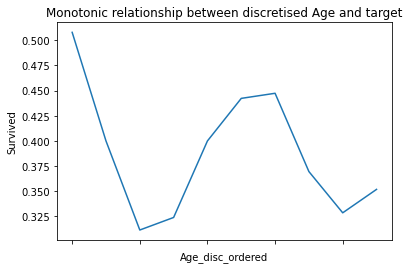

In [153]:
# Plot the monotonic relationship
fig = plt.figure()
fig = X_train.groupby(['Age_disc_ordered'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between discretised Age and target')
fig.set_ylabel('Survived')

<a id="53"></a> <br>
## 3. Discretisation using decision trees

Discretisation with Decision Trees consists of using a decision tree to identify the optimal splitting points that would determine the bins or contiguous intervals: 
First, it trains a decision tree of limited depth (2, 3 or 4) using the variable we want to discretise to predict the target.
The original variable values are then replaced by the probability returned by the tree. The probability is the same for all the observations within a single bin, thus replacing by the probability is equivalent to grouping the observations within the cut-off decided by the decision tree.

**Advantages**

* The probabilistic predictions returned decision tree are monotonically related to the target.
* The new bins show decreased entropy, this is the observations within each bucket / bin are more similar to themselves than to those of other buckets / bins.
* The tree finds the bins automatically

**Disadvantages**

* It may cause over-fitting
* More importantly, some tuning of tree parameters need to be done to obtain the optimal splits (e.g., depth, minimum number of samples in one partition, maximum number of partitions, and a minimum information gain). This it can be time consuming.

Below, I will demonstrate how to perform discretisation with decision trees using the Titanic dataset.

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import cross_val_score
# load the numerical variables of the Titanic Dataset
data_decision_tree = pd.read_csv('../input/titanic/train.csv', usecols = ['Age', 'Fare', 'Survived'])
data_decision_tree.head()

,Survived,Age,Fare
0,0,22.00,7.25
1,1,38.00,71.28
2,1,26.00,7.92
3,1,35.00,53.10
4,0,35.00,8.05


In [155]:
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(data_decision_tree[['Age', 'Fare', 'Survived']],
                                                    data_decision_tree.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 3), (268, 3))

In [156]:
X_train['Age'] = impute_na(data_decision_tree, 'Age')
X_test['Age'] = impute_na(data_decision_tree, 'Age')

In [157]:
# Let us now  build Classification tree using Age to predict Survived

tree_model = DecisionTreeClassifier(max_depth=2)
tree_model.fit(X_train.Age.to_frame(), X_train.Survived)
X_train['Age_tree'] = tree_model.predict_proba(X_train.Age.to_frame())[:,1]
X_train.head(10)

,Age,Fare,Survived,Age_tree
857,51.00,26.55,1,0.37
52,49.00,76.73,1,0.37
386,1.00,46.90,0,0.48
124,54.00,77.29,0,0.37
578,19.00,14.46,0,0.37
549,8.00,36.75,1,0.37
118,24.00,247.52,0,0.37
12,20.00,8.05,0,0.37
157,30.00,8.05,0,0.37
127,24.00,7.14,1,0.37


Text(0, 0.5, 'Survived')

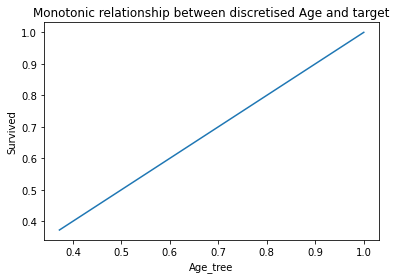

In [158]:
# monotonic relationship with target

fig = plt.figure()
fig = X_train.groupby(['Age_tree'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between discretised Age and target')
fig.set_ylabel('Survived')

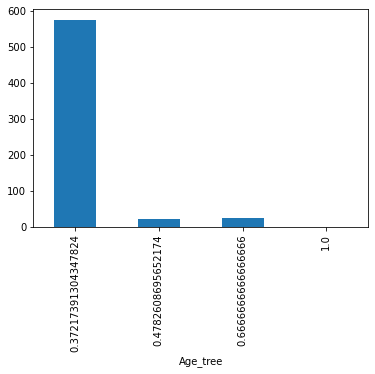

In [159]:
# Number of passengers per probabilistic bucket / bin

X_train.groupby(['Age_tree'])['Survived'].count().plot.bar()

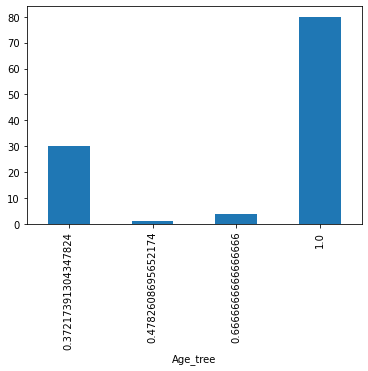

In [160]:
# Median age within each bucket originated by the tree

X_train.groupby(['Age_tree'])['Age'].median().plot.bar()

In [161]:
# Now let us see the Age limits buckets generated by the tree by capturing the minimum and maximum age per each probability bucket, we get an idea of the bucket cut-offs

pd.concat( [X_train.groupby(['Age_tree'])['Age'].min(),
            X_train.groupby(['Age_tree'])['Age'].max()], axis=1)

,Age,Age
Age_tree,,
0.37,8.00,74.00
0.48,0.42,2.00
0.67,3.00,6.00
1.00,80.00,80.00


**Conclusion**: Thus, the decision tree generated the buckets: 0-11, 12-15, 16-63 and 46-80, with probabilities of survival of .51, .81, .37 and .1 respectively.
# 6. Outlier Engineering<a id="6"></a> <br>

#### What is an Outlier?

An outlier is a data point in a data set that is distant from all other observations. A data point that lies outside the overall distribution of the dataset.

#### Should outliers be removed?
Depending on the context, outliers either deserve special attention or should be completely ignored. Take the example of revenue forecasting: if unusual spikes of revenue are observed, it's probably a good idea to pay extra attention to them and figure out what caused the spike. In the same way, an unusual transaction on a credit card is usually a sign of fraudulent activity, which is what the credit card issuer wants to prevent. So in instances like these, it is useful to look for and investigate further outlier values.

If outliers are however, due to mechanical error, measurement error or anything else that can't be generalised, it’s a good idea to filter out these outliers before feeding the data to the modeling algorithm. 

#### What defines an outlier?
* Data point that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile
* Data point that falls outside of 3 standard deviations. we can use a z score and if the z score falls outside of 2 standard deviation

#### Why do outliers exist in a dataset?
* Variability in the data
* An experimental measurement error

#### Impact of an Outlier
* It causes various problems during our statistical analysis
* It may cause a significant impact on the mean and the standard deviation

#### How to find an outlier?
Outlier analysis and anomaly detection are a huge field of research devoted to optimise methods and create new algorithms to reliably identify outliers. There are a huge number of ways optimised to detect outliers in different situations. These are mostly targeted to identify outliers when those are the observations that we indeed want to focus on, for example for fraudulent credit card activity.

Using the following methods we can detect an outlier
* IQR interquantile range
* z score
* Scatter plots
* Box plot


Now let us see how we can detect an outlier using the above methods and remove them where neccessary. 

<a id="61"></a> <br>
## <font color="blue">1. Outlier Detection & Removal

<a id="611"></a> <br>
## <font color="green">Outlier Detection & Removal using IQR(Inter Quartile Range)

![](https://i2.wp.com/makemeanalyst.com/wp-content/uploads/2017/05/IQR-1.png?resize=431%2C460)

The **interquartile range (IQR)** is a measure of variability, based on dividing a data set into quartiles.

Quartiles divide a rank-ordered data set into four equal parts. The values that divide each part are called the first, second, and third quartiles; and they are denoted by Q1, Q2, and Q3, respectively.

Q1 is the "middle" value in the first half of the rank-ordered data set.

Q2 is the median value in the set.

Q3 is the "middle" value in the second half of the rank-ordered data set.

The interquartile range is equal to Q3 minus Q1.

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# To display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

In [163]:
# Let us load the titanic dataset

data = pd.read_csv('../input/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


#### Now let us visualise median and quantiles for Age feature.Below illustration shows 25%, 50% and 75% are nothing but 25th quantile, median and 75th quantile respectively

In [164]:
data.Age.describe()

count   714.00
mean     29.70
std      14.53
min       0.42
25%      20.12
50%      28.00
75%      38.00
max      80.00
Name: Age, dtype: float64

#### Let's calculate the boundaries outside which sit the outliers assuming Age follows a Gaussian distribution

In [165]:
Upper_boundary_limit = data.Age.mean() + 3* data.Age.std()
Lower_boundary_limit = data.Age.mean() - 3* data.Age.std()

Upper_boundary_limit, Lower_boundary_limit

(73.27860964406095, -13.88037434994331)

#### The upper boundary for Age is 73-74 years. The lower boundary is meaningless as there can't be negative age. This value could be generated due to the lack of normality of the data.

#### Now let's use the IQR(Inter Quantile Range) to calculate the boundaries


In [166]:
IQR = data.Age.quantile(0.75) - data.Age.quantile(0.25)

Lower_quantile_lower = data.Age.quantile(0.25) - (IQR * 1.5)
Upper_quantile_lower = data.Age.quantile(0.75) + (IQR * 1.5)

Upper_quantile_lower, Lower_quantile_lower, IQR

(64.8125, -6.6875, 17.875)

#### The boundary using 1.5 times the interquantile range coincides roughly with the boundary determined using the Gaussian distribution (64 vs 71 years).

Now lets look for extreme outliers 

In [167]:
IQR = data.Age.quantile(0.75) - data.Age.quantile(0.25)

Lower_quantile = data.Age.quantile(0.25) - (IQR * 3)
Upper_quantile = data.Age.quantile(0.75) + (IQR * 3)

Upper_quantile, Lower_quantile, IQR

(91.625, -33.5, 17.875)

#### The boundary value using the 3 times the interquantile is a bit high according to normal human life expectancy, particularly in the days of the Titanic.

#### Now let us find out whether there are any outliers according to the above boundaries:

#### Before that let us first remove the passengers with missing data for Age feature.

In [168]:
data = data.dropna(subset=['Age'])

total_passengers = np.float(data.shape[0])

print('Passengers older than 73 years old (Gaussian approach): {}'.format(data[data.Age > 73].shape[0] / total_passengers))
print('Passengers older than 65 years (IQR): {}'.format(data[data.Age > 65].shape[0] / total_passengers))
print('Passengers older than 91 years (IQR, extreme): {}'.format(data[data.Age >= 91].shape[0] / total_passengers))

Passengers older than 73 years old (Gaussian approach): 0.0028011204481792717
Passengers older than 65 years (IQR): 0.011204481792717087
Passengers older than 91 years (IQR, extreme): 0.0


Approximately ~1-2 percent of the passengers were extremely old age.

#### Now finally here are the outliers 

In [169]:
data[(data.Age<Lower_quantile_lower)|(data.Age>Upper_quantile_lower)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.50,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.00,0,1,113509,61.98,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.00,0,0,PC 17754,34.65,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.50,0,0,370369,7.75,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.00,0,0,336439,7.75,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.00,0,0,13509,26.55,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.50,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.00,0,0,27042,30.00,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.00,0,0,C.A. 24580,10.50,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.00,1,1,WE/P 5735,71.00,B22,S


#### So clearly it is indicative that the above are the outliers . Based on the above observation it is evident that the majority of the outliers did not survive.

#### Now let us remove the outliers 

In [170]:
data_with_no_outlier = data[(data.Age>Lower_quantile_lower)&(data.Age<Upper_quantile_lower)]
data_with_no_outlier

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.00,0,5,382652,29.12,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C


### So finally after elimination of the outliers we are left with the above set of records in the dataset

<a id="612"></a> <br>
## <font color="green">Outlier Detection & Removal using Percentile

Outlier detection using percentile approach is requires loading and sorting the entire data set. This can be CPU and memory intensive, depending on the number of measurements. Averages don’t require keeping the entire data set in memory during the calculation, and their values don't need to be sorted. This makes percentiles relatively difficult to calculate over a large time span for systems with many measurements.

However for learning purpose I am including this method as well.Lets explore this in detail below.

In [171]:
df = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In this method there is no fixed approach for setting the upper and lower threshold and based on purely the problem statement and the dataset we have.In this example above we will be exploring the sale price of the house and define the upper and lower threshold values as 95% and 5% respectively.

In [172]:
upper_threshold = df['SalePrice'].quantile(0.95)
upper_threshold

326099.99999999994

In [173]:
lower_threshold = df['SalePrice'].quantile(0.05)
lower_threshold

88000.0

Now let us determine the outliers 

In [174]:
df[(df.SalePrice<lower_threshold)|(df.SalePrice>upper_threshold)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
11,12,60,RL,85.00,11924,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,WdShing,Wd Shng,Stone,286.00,Ex,TA,PConc,Ex,TA,No,GLQ,998,Unf,0,177,1175,GasA,Ex,Y,SBrkr,1182,1142,0,2324,1,0,3,0,4,1,Ex,11,Typ,2,Gd,BuiltIn,2005.00,Fin,3,736,TA,TA,Y,147,21,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000
29,30,30,RM,60.00,6324,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Feedr,RRNn,1Fam,1Story,4,6,1927,1950,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,520,520,GasA,Fa,N,SBrkr,520,0,0,520,0,0,1,0,1,1,Fa,4,Typ,0,NaN,Detchd,1920.00,Unf,1,240,Fa,TA,Y,49,0,87,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,68500
30,31,70,C (all),50.00,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.00,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,GasA,TA,N,SBrkr,649,668,0,1317,0,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1920.00,Unf,1,250,TA,Fa,N,0,54,172,0,0,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
39,40,90,RL,65.00,6040,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.00,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,nan,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
53,54,20,RL,68.00,50271,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,9,5,1981,1987,Gable,WdShngl,WdShing,Wd Shng,None,0.00,Gd,TA,CBlock,Ex,TA,Gd,GLQ,1810,Unf,0,32,1842,GasA,Gd,Y,SBrkr,1842,0,0,1842,2,0,0,1,0,1,Gd,5,Typ,1,Gd,Attchd,1981.00,Fin,3,894,TA,TA,Y,857,72,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,1389,20,RL,42.00,14892,Pave,NaN,IR1,HLS,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,1Story,9,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,Stone,160.00,Ex,TA,PConc,Ex,TA,Gd,GLQ,1320,Unf,0,426,1746,GasA,Ex,Y,SBrkr,1746,0,0,1746,1,0,2,0,3,1,Ex,7,Typ,2,Gd,Attchd,2006.00,Fin,3,758,TA,TA,Y,201,39,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,377500
1417,1418,60,RL,nan,16545,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,731.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,781,Unf,0,503,1284,GasA,Ex,Y,SBrkr,1310,1140,0,2450,1,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,1998.00,Fin,3,1069,TA,TA,Y,0,126,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,340000
1432,1433,30,RL,60.00,10800,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,4,6,1927,2007,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.00,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,656,656,GasA,TA,Y,SBrkr,968,0,0,968,0,0,2,0,4,1,TA,5,Typ,0,NaN,Detchd,1928.00,Unf,1,216,Fa,Fa,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,64500
1437,1438,20,RL,96.00,12444,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,426.00,Ex,TA,PConc,Ex,TA,Av

So we have got around 144 outliers .Now its time to eliminate these outliers if we think the defined thresholds makes sense for us.

Let us now remove the outliers

In [175]:
data_with_no_outlier_percentile_approach = df[(df.SalePrice>lower_threshold)&(df.SalePrice<upper_threshold)]
data_with_no_outlier_percentile_approach

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.00,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.00,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.00,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.00,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.00,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.00,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.00,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.00,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.00,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.00,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,TA,TA,Mn,

#### There we go with remaining dataset after eliminating the outliers 
<a id="613"></a> <br>
## <font color="green">Outlier Detection & Removal using Z score
![](https://www.simplypsychology.org/Z-score-formula.jpg)

### Z score indicates how many standard deviation away a data point is.

Let us relook at the titanic problem again and calculate **Mean** and **Standard Deviation** for the Age feature

In [176]:
data_zscore = pd.read_csv('../input/titanic/train.csv')

In [177]:
data_zscore.Age.mean(),data_zscore.Age.std()

(29.69911764705882, 14.526497332334044)

In this case mean is 29.69 and standard deviation is 14.52. 
Now let us calculate the Z score based on the above formula

In [178]:
data_zscore['zscore'] = ( data_zscore.Age - data_zscore.Age.mean() ) / data_zscore.Age.std()
data_zscore.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,zscore
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,-0.53
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,0.57
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,-0.25
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,0.36
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,0.36


Above for first record with age 22, z score is -0.53. This means 22 is -0.53 standard deviation away from mean

In [179]:
(22-29.69)/14.509433962264152

-0.53


#### Get data points that has z score higher than 3 or lower than -3. Another way of saying same thing is get data points that are more than 3 standard deviation away

In [180]:
data_zscore[(data_zscore.zscore>3) | (data_zscore.zscore<-3)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,zscore
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.00,0,0,27042,30.00,A23,S,3.46
851,852,0,3,"Svensson, Mr. Johan",male,74.00,0,0,347060,7.78,NaN,S,3.05


#### So above are the list of final outliers with data points more than 3 standard deviations away.

#### Now let us remove these outliers 

In [181]:
df_no_outliers_zscore = data_zscore[(data_zscore.zscore>-3) & (data_zscore.zscore<3)]
df_no_outliers_zscore.shape

(712, 13)

### So finally we were able to remove two outliers using this Z score approach
<a id="614"></a> <br>
## <font color="green">Outlier Detection & Removal using Box Plot
![](https://datavizcatalogue.com/methods/images/anatomy/box_plot.png)

A **boxplot** is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. 

Median (Q2/50th Percentile): the middle value of the dataset.

First quartile (Q1/25th Percentile): the middle number between the smallest number (not the “minimum”) and the median of the dataset.

Third quartile (Q3/75th Percentile): the middle value between the median and the highest value (not the “maximum”) of the dataset.

Inter Quartile range (IQR): 25th to the 75th percentile.
Whiskers (shown in above picture)

Outliers (shown as circles in above picture)

“maximum”: Q3 + 1.5*IQR

“minimum”: Q1 -1.5*IQR


Let us take the example of titanic dataset to show a simple box plot

In [182]:
data_box_plot = pd.read_csv('../input/titanic/train.csv')

#### Let us first look at the distribution of age feature using histogram as shown below

Text(0, 0.5, 'Number of Passengers')

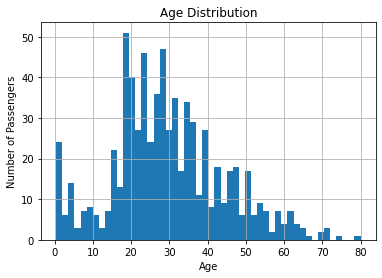

In [183]:
fig = data_box_plot.Age.hist(bins=50)
fig.set_title('Age Distribution')
fig.set_xlabel('Age')
fig.set_ylabel('Number of Passengers')

Now let us look at the boxplot of age feature

Text(0, 0.5, 'Age')

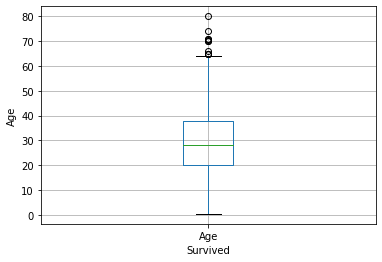

In [184]:
fig = data_box_plot.boxplot(column='Age')
fig.set_title('')
fig.set_xlabel('Survived')
fig.set_ylabel('Age')

<a id="615"></a> <br>
## <font color="green">Outlier Detection & Removal using Scatter Plot
![](https://www.learnbyexample.org/wp-content/uploads/r/typical-scatter-plot.png)
A **scatter plot** (also called a scatterplot, scatter graph, scatter chart, scattergram, or scatter diagram) is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data.


In [185]:
import pandas as pd
import seaborn as sns
train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")

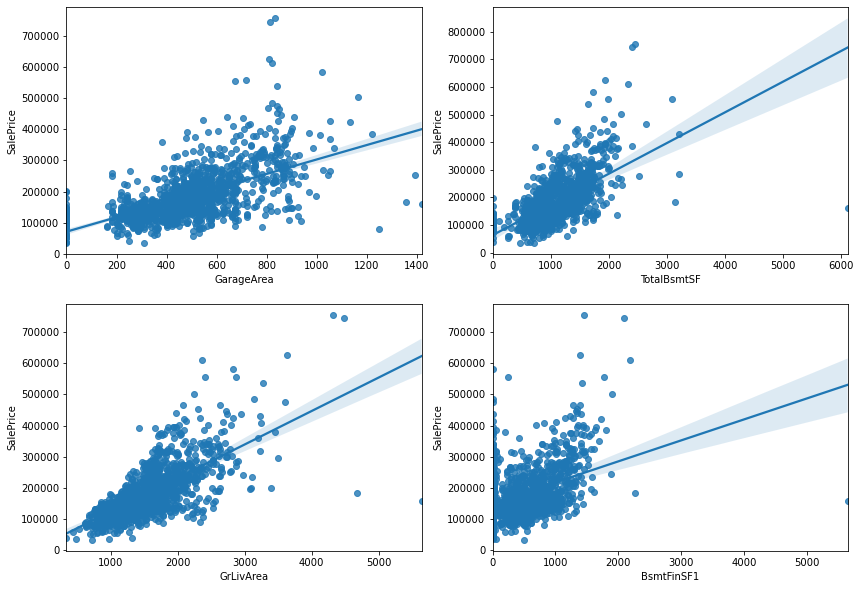

In [186]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
OverallQual_scatter_plot = pd.concat([train['SalePrice'],train['GarageArea']],axis = 1)
sns.regplot(x='GarageArea',y = 'SalePrice',data = OverallQual_scatter_plot,scatter= True, fit_reg=True, ax=ax1)
TotalBsmtSF_scatter_plot = pd.concat([train['SalePrice'],train['TotalBsmtSF']],axis = 1)
sns.regplot(x='TotalBsmtSF',y = 'SalePrice',data = TotalBsmtSF_scatter_plot,scatter= True, fit_reg=True, ax=ax2)
GrLivArea_scatter_plot = pd.concat([train['SalePrice'],train['GrLivArea']],axis = 1)
sns.regplot(x='GrLivArea',y = 'SalePrice',data = GrLivArea_scatter_plot,scatter= True, fit_reg=True, ax=ax3)
GarageArea_scatter_plot = pd.concat([train['SalePrice'],train['BsmtFinSF1']],axis = 1)
sns.regplot(x='BsmtFinSF1',y = 'SalePrice',data = GarageArea_scatter_plot,scatter= True, fit_reg=True, ax=ax4)

<a id="62"></a> <br>
## <font color="blue">2. Treating outliers as missing values
There are basically three methods for treating outliers in a data set. 
* Remove outliers as a means of trimming the data set. 
* Replacing the values of outliers or reducing the influence of outliers through outlier weight adjustments. 
* Estimate the values of outliers using robust techniques.

<a id="63"></a> <br>
## <font color="blue">3. Top / Bottom / Zero coding
**Top or bottom coding** are also known as Winsorisation or outlier capping. The procedure involves capping the maximum and minimum values at a predefined value. This predefined value can be arbitrary, or it can be derived from the variable distribution.

How can we derive the maximum and minimum values? 

If the variable is normally distributed we can cap the maximum and minimum values at the mean plus or minus 3 times the standard deviation. If the variable is skewed, we can use the inter-quantile range proximity rule or cap at the top and bottom percentiles.

<a id="64"></a> <br>
## <font color="blue">4. Discretisation

Discretisation handles outliers automatically, as outliers are sorted into the terminal bins, together with the other higher or lower value observations. The best approaches are equal frequency and tree based discretisation.

# 7. Feature Scaling <a id="7"></a> <br> 
![](https://miro.medium.com/max/3316/1*yR54MSI1jjnf2QeGtt57PA.png)
**Feature scaling** in machine learning is one of the most critical steps during the pre-processing of data before creating a machine learning model. Scaling can make a difference between a weak machine learning model and a better one.

The most common techniques of feature scaling are Normalization and Standardization.

**Normalisation**

One method utilised to bring all the variables to a more homogeneous scale is normalisation. Normalisation is synonym of centering the distribution. This means subtracting the mean of the variable to each observation. This procedure will "center" the new distribution at zero (the new mean of the variable will now be zero).

**Standarisation**

Standarisation is also used to bring all the variables to a similar scale. Standarisation means centering the variable at zero, and standarising the variance at 1. The procedure involves subtracting the mean of each observation and then dividing by the standard deviation:

z = (x - x_mean) / std


**Why do we need scaling?**

Machine learning algorithm just sees number — if there is a vast difference in the range say few ranging in thousands and few ranging in the tens, and it makes the underlying assumption that higher ranging numbers have superiority of some sort. So these more significant number starts playing a more decisive role while training the model.
The machine learning algorithm works on numbers and does not know what that number represents. A weight of 10 grams and a price of 10 dollars represents completely two different things — which is a no brainer for humans, but for a model as a feature, it treats both as same.

Another reason why feature scaling is applied is that few algorithms like Neural network gradient descent converge much faster with feature scaling than without it.
![](https://miro.medium.com/max/1200/1*yi0VULDJmBfb1NaEikEciA.png)

One more reason is saturation, like in the case of sigmoid activation in Neural Network, scaling would help not to saturate too fast.

**When to do scaling?**

Feature scaling is essential for machine learning algorithms that calculate distances between data. If not scale, the feature with a higher value range starts dominating when calculating distances, as explained intuitively in the “why?” section.

The ML algorithm is sensitive to the “relative scales of features,” which usually happens when it uses the numeric values of the features rather than say their rank.

In many algorithms, when we desire faster convergence, scaling is a MUST like in Neural Network.

Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions do not work correctly without normalization. For example, the majority of classifiers calculate the distance between two points by the distance. If one of the features has a broad range of values, the distance governs this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

Even when the conditions, as mentioned above, are not satisfied, you may still need to rescale your features if the ML algorithm expects some scale or a saturation phenomenon can happen. Again, a neural network with saturating activation functions (e.g., sigmoid) is a good example.

Rule of thumb we may follow here is an algorithm that computes distance or assumes normality, scales your features.
Some examples of algorithms where feature scaling matters are:

* K-nearest neighbors (KNN) with a Euclidean distance measure is sensitive to magnitudes and hence should be scaled for all features to weigh in equally.
* K-Means uses the Euclidean distance measure here feature scaling matters.
* Scaling is critical while performing Principal Component Analysis(PCA). PCA tries to get the features with maximum variance, and the variance is high for high magnitude features and skews the PCA towards high magnitude features.
* We can speed up gradient descent by scaling because θ descends quickly on small ranges and slowly on large ranges, and oscillates inefficiently down to the optimum when the variables are very uneven.

Algorithms that do not require normalization/scaling are the ones that rely on rules. They would not be affected by any monotonic transformations of the variables. Scaling is a monotonic transformation. Examples of algorithms in this category are all the tree-based algorithms — CART, Random Forests, Gradient Boosted Decision Trees. These algorithms utilize rules (series of inequalities) and do not require normalization.

In [187]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler,Normalizer
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
# load the numerical variables of the Titanic Dataset
data = pd.read_csv('../input/titanic/train.csv', usecols = ['Pclass', 'Age', 'Fare', 'Survived'])
data.head()

,Survived,Pclass,Age,Fare
0,0,3,22.00,7.25
1,1,1,38.00,71.28
2,1,3,26.00,7.92
3,1,1,35.00,53.10
4,0,3,35.00,8.05


In [188]:
data.describe()

,Survived,Pclass,Age,Fare
count,891.00,891.00,714.00,891.00
mean,0.38,2.31,29.70,32.20
std,0.49,0.84,14.53,49.69
min,0.00,1.00,0.42,0.00
25%,0.00,2.00,20.12,7.91
50%,0.00,3.00,28.00,14.45
75%,1.00,3.00,38.00,31.00
max,1.00,3.00,80.00,512.33


In [189]:
# let's look at missing data
data.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [190]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data[['Pclass', 'Age', 'Fare']],
                                                    data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 3), (268, 3))

In [191]:
# let's fill first the missing data

X_train.Age.fillna(X_train.Age.median(), inplace=True)
X_test.Age.fillna(X_train.Age.median(), inplace=True)

## 1. Standardisation<a id="71"></a> <br>
StandardScaler from scikit-learn removes the mean and scales the data to unit variance. 
![](https://miro.medium.com/max/171/0*P9VH6Ba9R9Az7uMX)
The Standard Scaler assumes data is normally distributed within each feature and scales them such that the distribution centered around 0, with a standard deviation of 1.
Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. If data is not normally distributed, this is not the best Scaler to use.

In [192]:
scaler = StandardScaler() # create an object
X_train_scaled = scaler.fit_transform(X_train) # fit the scaler to the train set, and then transform it

In [193]:
#let's have a look at the scaled training dataset: mean and standard deviation
print('means (Pclass, Age and Fare): ', X_train_scaled.mean(axis=0))
print('std (Pclass, Age and Fare): ', X_train_scaled.std(axis=0))

means (Pclass, Age and Fare):  [4.98976640e-17 1.16903099e-16 5.41746067e-17]
std (Pclass, Age and Fare):  [1. 1. 1.]


In [194]:
# let's look at the transformed min and max values
print('Min values (Pclass, Age and Fare): ', X_train_scaled.min(axis=0))
print('Max values (Pclass, Age and Fare): ', X_train_scaled.max(axis=0))

Min values (Pclass, Age and Fare):  [-1.5325562  -2.23351124 -0.67314402]
Max values (Pclass, Age and Fare):  [0.84844757 3.86209655 9.95192344]


(array([ 30.,  10.,  10.,  19.,  52.,  67.,  56., 183.,  56.,  34.,  28.,
         25.,  18.,  10.,  10.,   7.,   3.,   3.,   1.,   1.]),
 array([-2.23351124, -1.92873085, -1.62395046, -1.31917007, -1.01438968,
        -0.70960929, -0.4048289 , -0.10004851,  0.20473188,  0.50951227,
         0.81429266,  1.11907305,  1.42385344,  1.72863383,  2.03341422,
         2.33819461,  2.642975  ,  2.94775539,  3.25253577,  3.55731616,
         3.86209655]),
 <a list of 20 Patch objects>)

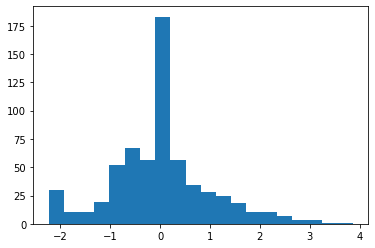

In [195]:
# let's look at the distribution of the transformed variable Age
plt.hist(X_train_scaled[:,1], bins=20)

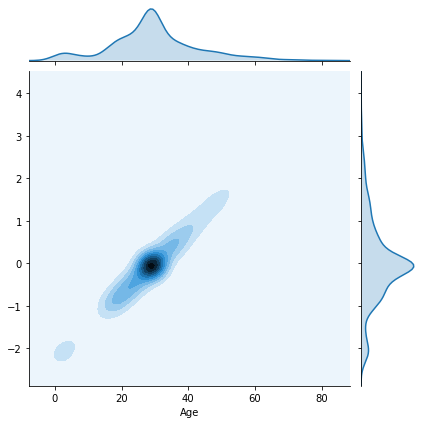

In [196]:
# let's look at how transformed age looks like compared to the original variable
sns.jointplot(X_train.Age, X_train_scaled[:,1], kind='kde')

## 2. Min-Max Scaling<a id="72"></a> <br>
![](https://image.slidesharecdn.com/qconsp17-featureengineering-170426171227/95/feature-engineering-getting-most-out-of-data-for-predictive-models-30-638.jpg?cb=1493234480)
Transform features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g., between zero and one. This Scaler shrinks the data within the range of -1 to 1 if there are negative values. We can set the range like [0,1] or [0,5] or [-1,1].
This Scaler responds well if the standard deviation is small and when a distribution is not Gaussian. This Scaler is sensitive to outliers.

In [197]:
minmaxscaler = MinMaxScaler() # create an object
X_train_scaled = minmaxscaler.fit_transform(X_train) # fit the scaler to the train set, and then transform it

In [198]:
#let's have a look at the scaled training dataset: mean and standard deviation
print('means (Pclass, Age and Fare): ', X_train_scaled.mean(axis=0))
print('std (Pclass, Age and Fare): ', X_train_scaled.std(axis=0))

means (Pclass, Age and Fare):  [0.64365971 0.36641321 0.06335433]
std (Pclass, Age and Fare):  [0.41999093 0.16405255 0.09411705]


In [199]:
# let's look at the transformed min and max values
print('Min values (Pclass, Age and Fare): ', X_train_scaled.min(axis=0))
print('Max values (Pclass, Age and Fare): ', X_train_scaled.max(axis=0))

Min values (Pclass, Age and Fare):  [0. 0. 0.]
Max values (Pclass, Age and Fare):  [1. 1. 1.]


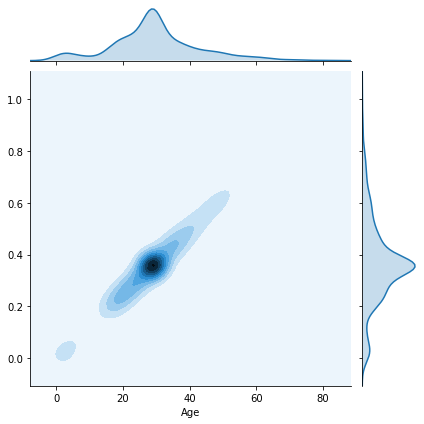

In [200]:
# let's look at how transformed age looks like compared to the original variable
sns.jointplot(X_train.Age, X_train_scaled[:,1], kind='kde')

## 3. Maximum Absolute Scaling<a id="73"></a> <br>
Scale each feature by its maximum absolute value. This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set is 1.0. It does not shift/center the data and thus does not destroy any sparsity.

On positive-only data, this Scaler behaves similarly to Min Max Scaler and, therefore, also suffers from the presence of significant outliers.

In [201]:
maxscaler = MaxAbsScaler() # create an object
X_train_scaled = maxscaler.fit_transform(X_train) # fit the scaler to the train set, and then transform it

In [202]:
#let's have a look at the scaled training dataset: mean and standard deviation
print('means (Pclass, Age and Fare): ', X_train_scaled.mean(axis=0))
print('std (Pclass, Age and Fare): ', X_train_scaled.std(axis=0))

means (Pclass, Age and Fare):  [0.76243981 0.3717195  0.06335433]
std (Pclass, Age and Fare):  [0.27999396 0.16267861 0.09411705]


In [203]:
# let's look at the transformed min and max values
print('Min values (Pclass, Age and Fare): ', X_train_scaled.min(axis=0))
print('Max values (Pclass, Age and Fare): ', X_train_scaled.max(axis=0))

Min values (Pclass, Age and Fare):  [0.33333333 0.008375   0.        ]
Max values (Pclass, Age and Fare):  [1. 1. 1.]


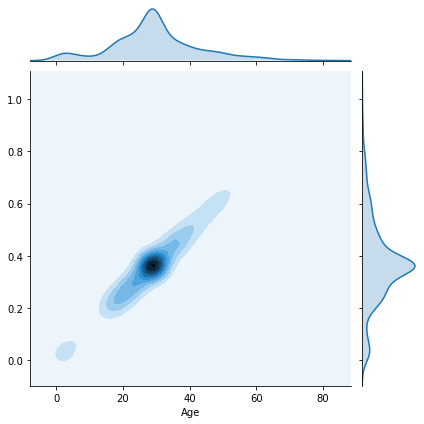

In [204]:
# let's look at how transformed age looks like compared to the original variable
sns.jointplot(X_train.Age, X_train_scaled[:,1], kind='kde')

## 4. Robust Scaling<a id="74"></a> <br>
This Scaler is robust to outliers. If our data contains many outliers, scaling using the mean and standard deviation of the data won’t work well.

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile). The centering and scaling statistics of this Scaler are based on percentiles and are therefore not influenced by a few numbers of huge marginal outliers. Note that the outliers themselves are still present in the transformed data. If a separate outlier clipping is desirable, a non-linear transformation is required.

In [205]:
robustscaler = RobustScaler() # create an object
X_train_scaled = robustscaler.fit_transform(X_train) # fit the scaler to the train set, and then transform it

In [206]:
#let's have a look at the scaled training dataset: mean and standard deviation
print('means (Pclass, Age and Fare): ', X_train_scaled.mean(axis=0))
print('std (Pclass, Age and Fare): ', X_train_scaled.std(axis=0))

means (Pclass, Age and Fare):  [-0.47512039  0.0567354   0.7440926 ]
std (Pclass, Age and Fare):  [0.55998791 1.00109914 2.05514812]


In [207]:
# let's look at the transformed min and max values
print('Min values (Pclass, Age and Fare): ', X_train_scaled.min(axis=0))
print('Max values (Pclass, Age and Fare): ', X_train_scaled.max(axis=0))

Min values (Pclass, Age and Fare):  [-1.33333333 -2.17923077 -0.63931806]
Max values (Pclass, Age and Fare):  [ 0.          3.92307692 21.19676931]


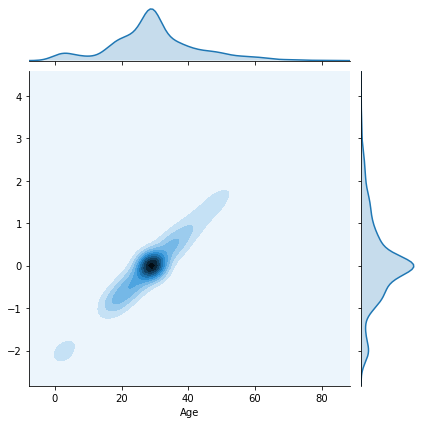

In [208]:
# let's look at how transformed age looks like compared to the original variable
sns.jointplot(X_train.Age, X_train_scaled[:,1], kind='kde')

## 5. Mean Normalisation<a id="75"></a> <br>

In [209]:
normalizer = Normalizer() # create an object
X_train_scaled = normalizer.fit_transform(X_train) # fit the scaler to the train set, and then transform it

In [210]:
#let's have a look at the scaled training dataset: mean and standard deviation
print('means (Pclass, Age and Fare): ', X_train_scaled.mean(axis=0))
print('std (Pclass, Age and Fare): ', X_train_scaled.std(axis=0))

means (Pclass, Age and Fare):  [0.07118038 0.73546506 0.54246514]
std (Pclass, Age and Fare):  [0.04576657 0.28155367 0.27998039]


In [211]:
# let's look at the transformed min and max values
print('Min values (Pclass, Age and Fare): ', X_train_scaled.min(axis=0))
print('Max values (Pclass, Age and Fare): ', X_train_scaled.max(axis=0))

Min values (Pclass, Age and Fare):  [0.00194707 0.00607036 0.        ]
Max values (Pclass, Age and Fare):  [0.27109231 0.99967143 0.99995981]


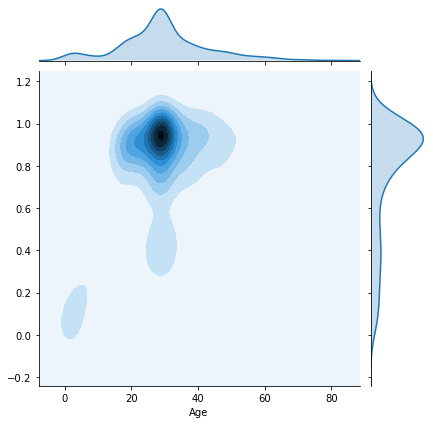

In [212]:
# let's look at how transformed age looks like compared to the original variable
sns.jointplot(X_train.Age, X_train_scaled[:,1], kind='kde')

## 6. Quantile Transformer Scaler<a id="76"></a> <br>
Transform features using quantiles information.

This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is, therefore, a robust pre-processing scheme.

The cumulative distribution function of a feature is used to project the original values. Note that this transform is non-linear and may distort linear correlations between variables measured at the same scale but renders variables measured at different scales more directly comparable. This is also sometimes called as Rank scaler.

In [213]:
from sklearn.preprocessing import QuantileTransformer
quantileTransformer = QuantileTransformer()
X_train_scaled = quantileTransformer.fit_transform(X_train) # fit the scaler to the train set, and then transform it

In [214]:
#let's have a look at the scaled training dataset: mean and standard deviation
print('means (Pclass, Age and Fare): ', X_train_scaled.mean(axis=0))
print('std (Pclass, Age and Fare): ', X_train_scaled.std(axis=0))

means (Pclass, Age and Fare):  [0.61317244 0.49999742 0.49996903]
std (Pclass, Age and Fare):  [0.43429176 0.28758361 0.28921539]


In [215]:
# let's look at the transformed min and max values
print('Min values (Pclass, Age and Fare): ', X_train_scaled.min(axis=0))
print('Max values (Pclass, Age and Fare): ', X_train_scaled.max(axis=0))

Min values (Pclass, Age and Fare):  [0. 0. 0.]
Max values (Pclass, Age and Fare):  [1. 1. 1.]


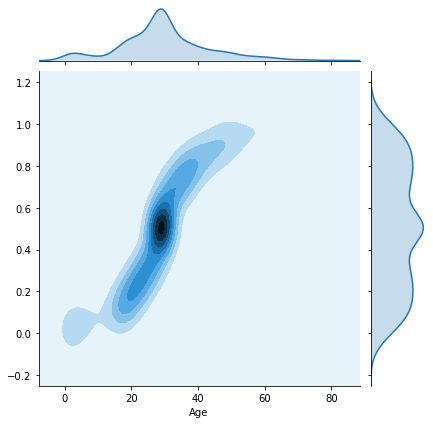

In [216]:
# let's look at how transformed age looks like compared to the original variable
sns.jointplot(X_train.Age, X_train_scaled[:,1], kind='kde')

## 7. Power Transformer Scaler<a id="77"></a> <br>
The power transformer is a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to the variability of a variable that is unequal across the range (heteroscedasticity) or situations where normality is desired.

The power transform finds the optimal scaling factor in stabilizing variance and minimizing skewness through maximum likelihood estimation. Currently, Sklearn implementation of PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform. The optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood. Box-Cox requires input data to be strictly positive, while Yeo-Johnson supports both positive or negative data.

In [217]:
from sklearn.preprocessing import PowerTransformer
powerTransformer = PowerTransformer()
X_train_scaled = powerTransformer.fit_transform(X_train) # fit the scaler to the train set, and then transform it

In [218]:
#let's have a look at the scaled training dataset: mean and standard deviation
print('means (Pclass, Age and Fare): ', X_train_scaled.mean(axis=0))
print('std (Pclass, Age and Fare): ', X_train_scaled.std(axis=0))

means (Pclass, Age and Fare):  [-1.59672525e-16  1.81057238e-16 -3.05088574e-16]
std (Pclass, Age and Fare):  [1. 1. 1.]


In [219]:
# let's look at the transformed min and max values
print('Min values (Pclass, Age and Fare): ', X_train_scaled.min(axis=0))
print('Max values (Pclass, Age and Fare): ', X_train_scaled.max(axis=0))

Min values (Pclass, Age and Fare):  [-1.43881072 -2.50611683 -3.91103398]
Max values (Pclass, Age and Fare):  [0.88330318 3.50826625 2.90851453]


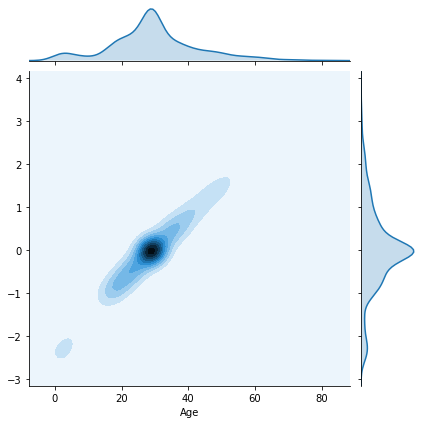

In [220]:
# let's look at how transformed age looks like compared to the original variable
sns.jointplot(X_train.Age, X_train_scaled[:,1], kind='kde')

# 8. Date and Time Engineering<a id="8"></a> <br>
Time is the most essential concept in any business.There is a lot of nuance to time series data that we need to consider when we’re working with datasets that are time-sensitive.Existing time series forecasting models undoubtedly work well in most cases, but they do have certain limitations. 
![](https://mangarella.github.io/BreatheFree/Images/new_feature_engineering.png)

There’s no one-size-fits-all approach here. There’ll be projects, such as demand forecasting or click prediction when you would need to rely on supervised learning algorithms.And there’s where feature engineering for time series comes to the fore. This has the potential to transform your time series model from just a good one to a powerful forecasting model.

<a id="81"></a> <br>
## 1. Introduction

In [221]:
import pandas as pd
data = pd.read_csv('../input/birdsong-recognition/train.csv')
data.dtypes

rating              float64
playback_used        object
ebird_code           object
channels             object
date                 object
pitch                object
duration              int64
filename             object
speed                object
species              object
number_of_notes      object
title                object
secondary_labels     object
bird_seen            object
sci_name             object
location             object
latitude             object
sampling_rate        object
type                 object
elevation            object
description          object
bitrate_of_mp3       object
file_type            object
volume               object
background           object
xc_id                 int64
url                  object
country              object
author               object
primary_label        object
longitude            object
length               object
time                 object
recordist            object
license              object
dtype: object

## 2. Date-Related Features<a id="82"></a> <br>
We can find out the birds pattern for weekdays and weekends based on historical data. Thus, having information about the day, month, year, etc. can be useful for forecasting the value

In [222]:
import pandas as pd
data = pd.read_csv('../input/birdsong-recognition/train.csv')
data['date'] = pd.to_datetime(data['date'],format='%Y-%m-%d', errors='coerce')

data['year']=data['date'].dt.year 
data['month']=data['date'].dt.month 
data['day']=data['date'].dt.day
data['dayofweek_num']=data['date'].dt.dayofweek  
data['dayofweek_name']=data['date'].dt.weekday
data.head()

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,number_of_notes,title,secondary_labels,bird_seen,sci_name,location,latitude,sampling_rate,type,elevation,description,bitrate_of_mp3,file_type,volume,background,xc_id,url,country,author,primary_label,longitude,length,time,recordist,license,year,month,day,dayofweek_num,dayofweek_name
0,3.50,no,aldfly,1 (mono),2013-05-25,Not specified,25,XC134874.mp3,Not specified,Alder Flycatcher,Not specified,XC134874 Alder Flycatcher (Empidonax alnorum),"['Empidonax minimus_Least Flycatcher', 'Leioth...",yes,Empidonax alnorum,"Grey Cloud Dunes SNA, Washington, Minnesota",44.793,48000 (Hz),call,220 m,Two short segments of fairly quiet *pip* calls...,192000 (bps),mp3,Not specified,American Yellow Warbler (Setophaga aestiva); L...,134874,https://www.xeno-canto.org/134874,United States,Jonathon Jongsma,Empidonax alnorum_Alder Flycatcher,-92.962,Not specified,8:00,Jonathon Jongsma,Creative Commons Attribution-ShareAlike 3.0,2013.00,5.00,25.00,5.00,5.00
1,4.00,no,aldfly,2 (stereo),2013-05-27,both,36,XC135454.mp3,both,Alder Flycatcher,1-3,XC135454 Alder Flycatcher (Empidonax alnorum),[],yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,At least three birds seen here moving around s...,128000 (bps),mp3,level,NaN,135454,https://www.xeno-canto.org/135454,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,2013.00,5.00,27.00,0.00,0.00
2,4.00,no,aldfly,2 (stereo),2013-05-27,both,39,XC135455.mp3,both,Alder Flycatcher,1-3,XC135455 Alder Flycatcher (Empidonax alnorum),[],yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,At least three birds seen chasing each other a...,128000 (bps),mp3,level,NaN,135455,https://www.xeno-canto.org/135455,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,2013.00,5.00,27.00,0.00,0.00
3,3.50,no,aldfly,2 (stereo),2013-05-27,both,33,XC135456.mp3,both,Alder Flycatcher,1-3,XC135456 Alder Flycatcher (Empidonax alnorum),"['Dumetella carolinensis_Gray Catbird', 'Bomby...",yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,img:http://www.flickr.com/photos/madbirder/888...,128000 (bps),mp3,level,Grey Catbird (Dumetella carolinensis); Cedar W...,135456,https://www.xeno-canto.org/135456,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,2013.00,5.00,27.00,0.00,0.00
4,4.00,no,aldfly,2 (stereo),2013-05-27,both,36,XC135457.mp3,level,Alder Flycatcher,1-3,XC135457 Alder Flycatcher (Empidonax alnorum),[],yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,img:http://www.flickr.com/photos/madbirder/888...,128000 (bps),mp3,level,NaN,135457,https://www.xeno-canto.org/135457,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,2013.00,5.00,27.00,0.00,0.00


## 3. Time-Related Features<a id="83"></a> <br>
We can similarly extract more granular features if we have the time stamp. For instance, we can determine the hour or minute of the day when the data was recorded and compare the trends between the business hours and non-business hours.

If we are able to extract the ‘hour’ feature from the time stamp, we can make more insightful conclusions about the data. 

Extracting time-based features is very similar to what we did above when extracting date-related features. We start by converting the column to DateTime format and use the .dt accessor. Here’s how to do it in Python:

In [223]:
import pandas as pd
data = pd.read_csv('../input/birdsong-recognition/train.csv')
data['time'] = pd.to_datetime(data['date'],format='%Y-%m-%d', errors='coerce')

data['time'] = pd.to_datetime(data['time'],format='%H:%M')

data['Hour'] = data['time'].dt.hour 
data['minute'] = data['time'].dt.minute 

data.head()

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,number_of_notes,title,secondary_labels,bird_seen,sci_name,location,latitude,sampling_rate,type,elevation,description,bitrate_of_mp3,file_type,volume,background,xc_id,url,country,author,primary_label,longitude,length,time,recordist,license,Hour,minute
0,3.50,no,aldfly,1 (mono),2013-05-25,Not specified,25,XC134874.mp3,Not specified,Alder Flycatcher,Not specified,XC134874 Alder Flycatcher (Empidonax alnorum),"['Empidonax minimus_Least Flycatcher', 'Leioth...",yes,Empidonax alnorum,"Grey Cloud Dunes SNA, Washington, Minnesota",44.793,48000 (Hz),call,220 m,Two short segments of fairly quiet *pip* calls...,192000 (bps),mp3,Not specified,American Yellow Warbler (Setophaga aestiva); L...,134874,https://www.xeno-canto.org/134874,United States,Jonathon Jongsma,Empidonax alnorum_Alder Flycatcher,-92.962,Not specified,2013-05-25,Jonathon Jongsma,Creative Commons Attribution-ShareAlike 3.0,0.00,0.00
1,4.00,no,aldfly,2 (stereo),2013-05-27,both,36,XC135454.mp3,both,Alder Flycatcher,1-3,XC135454 Alder Flycatcher (Empidonax alnorum),[],yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,At least three birds seen here moving around s...,128000 (bps),mp3,level,NaN,135454,https://www.xeno-canto.org/135454,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),2013-05-27,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,0.00,0.00
2,4.00,no,aldfly,2 (stereo),2013-05-27,both,39,XC135455.mp3,both,Alder Flycatcher,1-3,XC135455 Alder Flycatcher (Empidonax alnorum),[],yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,At least three birds seen chasing each other a...,128000 (bps),mp3,level,NaN,135455,https://www.xeno-canto.org/135455,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),2013-05-27,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,0.00,0.00
3,3.50,no,aldfly,2 (stereo),2013-05-27,both,33,XC135456.mp3,both,Alder Flycatcher,1-3,XC135456 Alder Flycatcher (Empidonax alnorum),"['Dumetella carolinensis_Gray Catbird', 'Bomby...",yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,img:http://www.flickr.com/photos/madbirder/888...,128000 (bps),mp3,level,Grey Catbird (Dumetella carolinensis); Cedar W...,135456,https://www.xeno-canto.org/135456,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),2013-05-27,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,0.00,0.00
4,4.00,no,aldfly,2 (stereo),2013-05-27,both,36,XC135457.mp3,level,Alder Flycatcher,1-3,XC135457 Alder Flycatcher (Empidonax alnorum),[],yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,img:http://www.flickr.com/photos/madbirder/888...,128000 (bps),mp3,level,NaN,135457,https://www.xeno-canto.org/135457,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),2013-05-27,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,0.00,0.00


Similarly, we can extract a number of features from the date column. Here’s a complete list of features that we can generate:
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/11/time-features.png)
## 4. Lag Features<a id="84"></a> <br>
When working on a time series problem can anyone imagine that we can also use the target variable for feature engineering!Strange right but we can :)

Consider this – you are predicting the sale price for a house. So, the previous prices of house price is important to make a prediction, right? In other words, the value at time t is greatly affected by the value at time t-1. The past values are known as lags, so t-1 is lag 1, t-2 is lag 2, and so on.

In [224]:
import pandas as pd
data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
data['YrSold'] = pd.to_datetime(data['YrSold'],format='%Y')

data['lag_1'] = data['SalePrice'].shift(1)
data = data[['YrSold', 'lag_1', 'SalePrice']]
data.head()

,YrSold,lag_1,SalePrice
0,2008-01-01,nan,208500
1,2007-01-01,208500.00,181500
2,2008-01-01,181500.00,223500
3,2006-01-01,223500.00,140000
4,2008-01-01,140000.00,250000


Here, we were able to generate lag one feature for our series. But why lag one? Why not five or seven? To answer this let us understand it better below.

The lag value we choose will depend on the correlation of individual values with its past values.

If the series has a weekly trend, which means the value last Monday can be used to predict the value for this Monday, you should create lag features for seven days. Getting the drift?

We can create multiple lag features as well! Let’s say we want lag 1 to lag 7 – we can let the model decide which is the most valuable one. So, if we train a linear regression model, it will assign appropriate weights (or coefficients) to the lag features:

In [225]:
import pandas as pd
data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
data['YrSold'] = pd.to_datetime(data['YrSold'],format='%Y')

data['lag_1'] = data['SalePrice'].shift(1)
data['lag_2'] = data['SalePrice'].shift(2)
data['lag_3'] = data['SalePrice'].shift(3)
data['lag_4'] = data['SalePrice'].shift(4)
data['lag_5'] = data['SalePrice'].shift(5)
data['lag_6'] = data['SalePrice'].shift(6)
data['lag_7'] = data['SalePrice'].shift(7)
data = data[['YrSold', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'SalePrice']]
data.head()

,YrSold,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,SalePrice
0,2008-01-01,nan,nan,nan,nan,nan,nan,nan,208500
1,2007-01-01,208500.00,nan,nan,nan,nan,nan,nan,181500
2,2008-01-01,181500.00,208500.00,nan,nan,nan,nan,nan,223500
3,2006-01-01,223500.00,181500.00,208500.00,nan,nan,nan,nan,140000
4,2008-01-01,140000.00,223500.00,181500.00,208500.00,nan,nan,nan,250000


There is more than one way of determining the lag at which the correlation is significant. For instance, we can use the ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots.

ACF: The ACF plot is a measure of the correlation between the time series and the lagged version of itself
PACF: The PACF plot is a measure of the correlation between the time series with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons

For our particular example, here are the ACF and PACF plots:

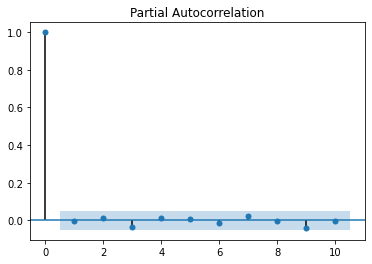

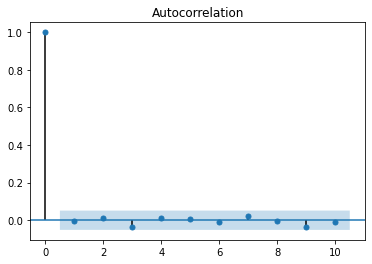

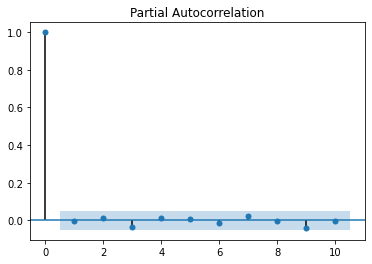

In [226]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(data['SalePrice'], lags=10)
plot_pacf(data['SalePrice'], lags=10)

The partial autocorrelation function shows a high correlation with the first lag and lesser correlation with the second and third lag. The autocorrelation function shows a slow decay, which means that the future values have a very high correlation with its past values.

**Note :** The number of times you shift, the same number of values will be reduced from the data. You would see some rows with NaNs at the start. That’s because the first observation has no lag. You’ll need to discard these rows from the training data.

## 5. Rolling Window<a id="85"></a> <br>
How about calculating some statistical values based on past values? This method is called the **rolling window method** because the window would be different for every data point.
![](https://www.mathworks.com/help/econ/rollingwindow.png)
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/11/3hotmk.gif)
Since this looks like a window that is sliding with every next point, the features generated using this method are called the ‘rolling window’ features.

Now the question we need to address – how are we going to perform feature engineering here? Let’s start simple. We will select a window size, take the average of the values in the window, and use it as a feature. Let’s implement it in Python:

In [227]:
import pandas as pd
data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
data['YrSold'] = pd.to_datetime(data['YrSold'],format='%Y')

data['rolling_mean'] = data['SalePrice'].rolling(window=7).mean()
data = data[['YrSold', 'rolling_mean', 'SalePrice']]
data.head(10)

,YrSold,rolling_mean,SalePrice
0,2008-01-01,nan,208500
1,2007-01-01,nan,181500
2,2008-01-01,nan,223500
3,2006-01-01,nan,140000
4,2008-01-01,nan,250000
5,2009-01-01,nan,143000
6,2007-01-01,207642.86,307000
7,2009-01-01,206428.57,200000
8,2008-01-01,199057.14,129900
9,2008-01-01,183985.71,118000


Similarly, you can consider the sum, min, max value, etc. (for the selected window) as a feature and try it out on your own machine.
## 6. Expanding Window<a id="86"></a> <br>
This is simply an advanced version of the rolling window technique. In the case of a rolling window, the size of the window is constant while the window slides as we move forward in time. Hence, we consider only the most recent values and ignore the past values.

The idea behind the expanding window feature is that it takes all the past values into account.

As shown below expanding window function how it works:
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/12/output_B4KHcT.gif)
As you can see, with every step, the size of the window increases by one as it takes into account every new value in the series. This can be implemented easily in Python by using the expanding() function. Let’s code this using the same data:

In [228]:
import pandas as pd
data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
data['YrSold'] = pd.to_datetime(data['YrSold'],format='%Y')

data['Expanding_Mean'] = data['SalePrice'].expanding(2).mean()
data = data[['YrSold', 'SalePrice','Expanding_Mean']]
data.head(10)

,YrSold,SalePrice,Expanding_Mean
0,2008-01-01,208500,nan
1,2007-01-01,181500,195000.00
2,2008-01-01,223500,204500.00
3,2006-01-01,140000,188375.00
4,2008-01-01,250000,200700.00
5,2009-01-01,143000,191083.33
6,2007-01-01,307000,207642.86
7,2009-01-01,200000,206687.50
8,2008-01-01,129900,198155.56
9,2008-01-01,118000,190140.00


## 7. Domain-Specific<a id="87"></a> <br>
Having a good understanding of the problem statement, clarity of the end objective and knowledge of the available data is essential to engineer domain-specific features for the model.

# 9. Read more <a id="9"></a> <br>


## 1. References<a id="111"></a> <br>

* https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159
* https://mux.com/blog/using-percentiles-to-identify-outliers/
* https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5548942/#:~:text=There%20are%20basically%20three%20methods,outliers%20through%20outlier%20weight%20adjustments.
* https://www.trainindata.com/post/feature-engineering-comprehensive-overview
* https://towardsdatascience.com/feature-engineering-techniques-9a57e4901545
* https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35
* https://www.analyticsvidhya.com/blog/2019/12/6-powerful-feature-engineering-techniques-time-series/

# I hope by now you have a fair good understanding of what is Feature Engineering is all about.

# Greatly appreciate to leave your comments /feedback and if you like this kernel notebook please do <font color=red> UPVOTE</font>